**Исследовательский анализ**

# [Kaggle — Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic/overview)

**Входные данные:** с сайта соревнования.


**Цель проекта:** исследовательский анализ данных из проекта "Spaceship Titanic".


**Задачи проекта:**

## Начальная подготовка

### Импорты

In [901]:
import pandas as pd
import numpy as np

import os
import json
import warnings
from datetime import date, time, datetime

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

### Константы

In [902]:
RANDOM_STATE = RS = 66    # константа для параметра random_state
CR = '\n'                 # новая строка

### Вспомогательные функции 

In [903]:
def custom_read_csv(path_local, separator=','):
    """
    чтение датасета:
      сначала из локального хранилища;
      при неудаче — из удаленного хранилища (добавление слеша – особенности синтаксиса линукса или как там его)
    """

    path_remote = '/' + path_local

    if os.path.exists(path_local):
        return pd.read_csv(path_local, sep=separator)

    elif os.path.exists(path_remote):
        return pd.read_csv(path_remote, sep=separator)

    else:
        print('Ошибка')

In [904]:
def df_name(df):
    """
    определение имени таблицы
    """
    return [name for name in globals() if globals()[name] is df][0]

In [905]:
def basic_info(df: pd.DataFrame, sample_type='sample', qnty=5):
    """
    первичная информация о таблице: info(), sample()/head()/tail(), describe()
    """
    
    # заголовок (имя исследуемого датафрейма)
    
    print(f'\n\nдатафрейм {f.BOLD}{df_name(df)}{f.END}', '≋'*30)


    # метод info()
    
    print('\n\n--- метод info() ---\n')
    print(df.info())

    
    # несколько случайных записей
    
    print(f'\n\n--- метод {sample_type}({qnty}) ---' + '\n')
    
    if sample_type == 'sample':
        display(df.sample(qnty))
    elif sample_type == 'head':
        display(df.head(qnty))
    elif sample_type == 'tail':
        display(df.tail(qnty))
    else:
        print(f'{sample_type} – недопустимое значение параметра "sample_type" ')
    
    
    # метод describe()
    
    print('\n\n--- метод describe() ---\n')
    
    try:
        display(df.describe(include=np.number))
    except ValueError:
        pass

    try:
        display(df.describe(exclude=np.number))
    except ValueError:
        pass

### Оформление

In [906]:
# выделение в тексте
class f:
    BOLD = "\033[1m"
    ITALIC = "\033[3m"
    END = "\033[0m"

In [907]:
# оформление графиков по-умолчанию

# Matplotlib, Seaborn
sns.set_style('whitegrid', {'axes.facecolor': '0.98', 'grid.color': '0.9', 'axes.edgecolor': '1.0'})
plot_dpi = 150                                        # dpi для рендеринга графиков

# plt.style.use('fivethirtyeight')


# Plotly Graph_Objects
pio.templates['my_theme'] = go.layout.Template(
                                               layout_autosize=True,
                                               # width=900,
                                               layout_height=150,
                                               layout_legend_orientation="h",
                                               layout_margin=dict(t=40, b=40),         # (l=0, r=0, b=0, t=0, pad=0)
                                               layout_template='seaborn',
                                              )
pio.templates.default = 'my_theme'

# цвета, цветовые схемы
colors_1 = ['darkcyan', 'skyblue', 'gray', 'orange', 'tomato']
colors_2 = ['darkcyan', 'orange', 'tomato']
colors_3 = ['#789395', '#94B49F', '#B4CFB0', '#E5E3C9']
colors_4 = 'crest_r'

In [908]:
# оформление Pandas
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format
# pd.options.display.colheader_justify = 'left'
# pd.options.display.precision = 7
# pandas.options.mode.use_inf_as_na = True

In [909]:
# оформление — прочее
warnings.filterwarnings('ignore')

## Входные данные

### Чтение данных

In [910]:
data_train = custom_read_csv('datasets/train.csv')  # пасссажиры, для которых известно значение Survived
data_test = custom_read_csv('datasets/test.csv')    # пасссажиры, для которых НЕизвестно значение Survived

### Объединение train и test для общей обработки

Потом разделим обратно на train и test.

Под тестовой выборкой подразумевается выборка без известных ответов, которую нужно использовать для прогноза, а затем прогноз отправить на сервер и получить оценку качества модели.

In [911]:
data = pd.concat([data_train, data_test], ignore_index=True)

### Первичная информация о данных

In [912]:
basic_info(data)



датафрейм data ≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋≋


--- метод info() ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB
None


--- метод sample(5) ---



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7758,8277_01,Earth,True,G/1348/P,55 Cancri e,32.000,False,0.000,0.000,0.000,0.000,0.000,Diandy Woody,True
208,0221_06,Mars,False,E/13/S,TRAPPIST-1e,16.000,False,915.000,0.000,221.000,234.000,0.000,Gran Reke,False
5055,5406_01,NaN,False,F/1035/S,PSO J318.5-22,22.000,NaN,2.000,46.000,0.000,483.000,67.000,Shally Langatein,False
10153,3135_01,Earth,False,F/650/P,55 Cancri e,18.000,False,298.000,0.000,0.000,342.000,0.000,Danna Douglasen,NaN
8051,8609_01,Earth,False,E/564/S,TRAPPIST-1e,27.000,False,0.000,0.000,2.000,994.000,0.000,Bara Cochrisons,False




--- метод describe() ---



,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000,12707.000,12681.000,12664.000,12686.000,12702.000
mean,28.772,222.898,451.962,174.906,308.477,306.789
std,14.387,647.597,1584.371,590.559,1130.280,1180.097
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,19.000,0.000,0.000,0.000,0.000,0.000
50%,27.000,0.000,0.000,0.000,0.000,0.000
75%,38.000,49.000,77.000,29.000,57.000,42.000
max,79.000,14327.000,29813.000,23492.000,22408.000,24133.000


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,12970,12682,12660,12671,12696,12674,12676,8693
unique,12970,3,2,9825,3,2,12629,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Carry Contrevins,True
freq,1,6865,8079,8,8871,12401,2,4378


### Анализ пропусков

In [913]:
nan_fields = data.columns[data.isna().any()].to_list()

In [914]:
# # работает долго !!!
# fig, ax = plt.subplots(figsize=(15,3), dpi=plot_dpi)
# sns.heatmap(data[nan_fields].isna().T, cbar=False, cmap='Oranges');

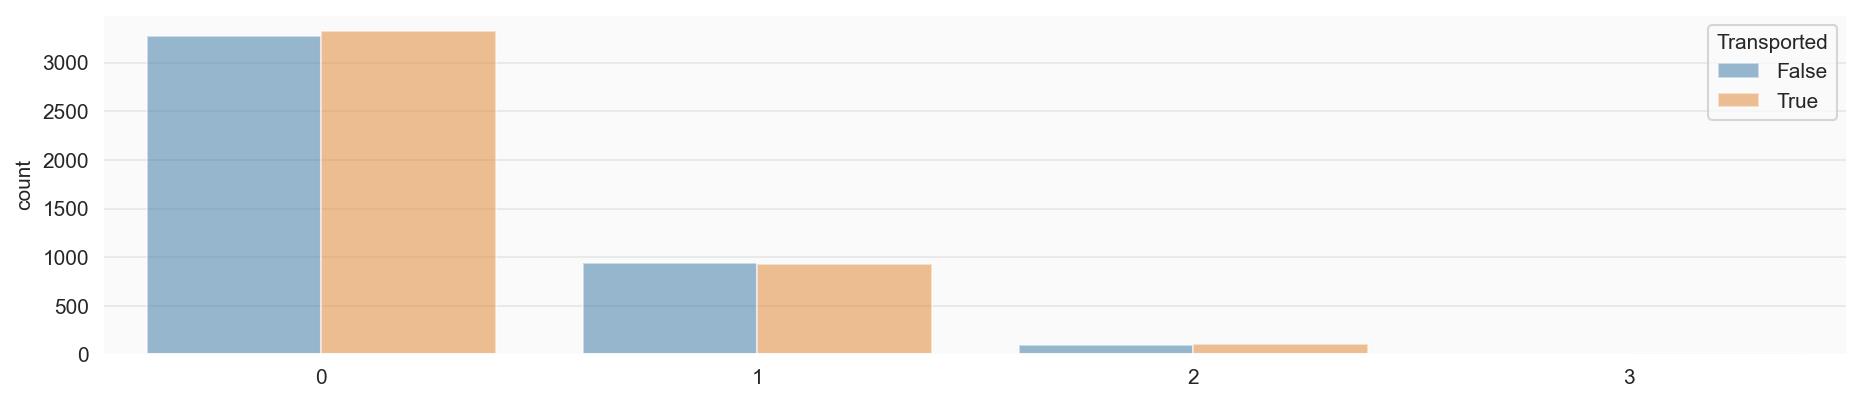

In [915]:
fig, ax = plt.subplots(figsize=(15,3), dpi=plot_dpi)
sns.countplot(x=data.drop('Transported', axis=1).isna().sum(axis=1), hue=data.Transported, palette='tab10', alpha=0.5);

> Пропуски расположены хаотично, все поля кроме `PassengerId` содержат пропуски.
> 
> Придется совмещать EDA с заполнением пропусков.

## Предобрабтка входных данных

### Типы данных

Пока достаточно заменить булевый тип (не дает строить графики, нельзя проверить корреляцию).  
Метод `map` использован из-за `NaN` в данных.

In [916]:
bool_map = {True:1, False:0}

data.Transported = data.Transported.map(bool_map)
data.CryoSleep = data.CryoSleep.map(bool_map)
data.VIP = data.VIP.map(bool_map)

## Извлечение признаков из комбо-признаков

### Cabin: extract Cabin_deck, Cabin_num, Cabin_side

Выделение номера палубы, номера каюты и стороны расположения каюты. Номера кают можно сгруппировать по признаку Transported.

In [917]:
data.Cabin = data.Cabin.fillna('_/-1/_')    # временное заполнение NaN

data[['Cabin_deck','Cabin_num','Cabin_side']] = data.Cabin.str.split(r'/', expand=True)   #.astype('category')
data.Cabin_num = data.Cabin_num.astype('int16')

# обратное восстановление NaN
data[['Cabin_deck','Cabin_side']] = data[['Cabin_deck','Cabin_side']].replace('_', np.NaN)
data.Cabin_num = data.Cabin_num.replace(-1, np.NaN)

Cabin_deck

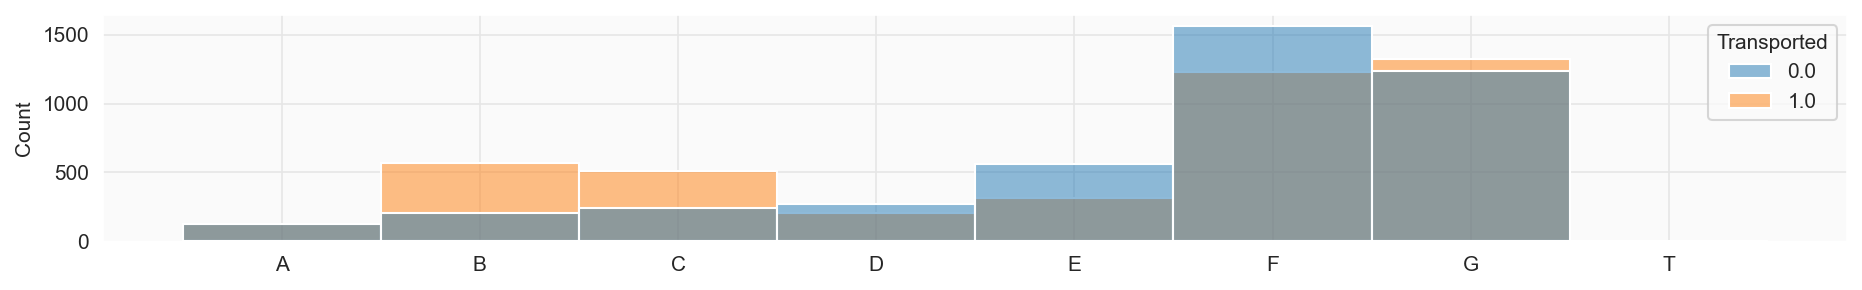

In [918]:
fig, ax = plt.subplots(figsize=(15,2), dpi=plot_dpi)
sns.histplot(x=pd.Categorical(data.Cabin_deck, list('ABCDEFGT')),
             hue=data.Transported, palette='tab10');

Cabin_side

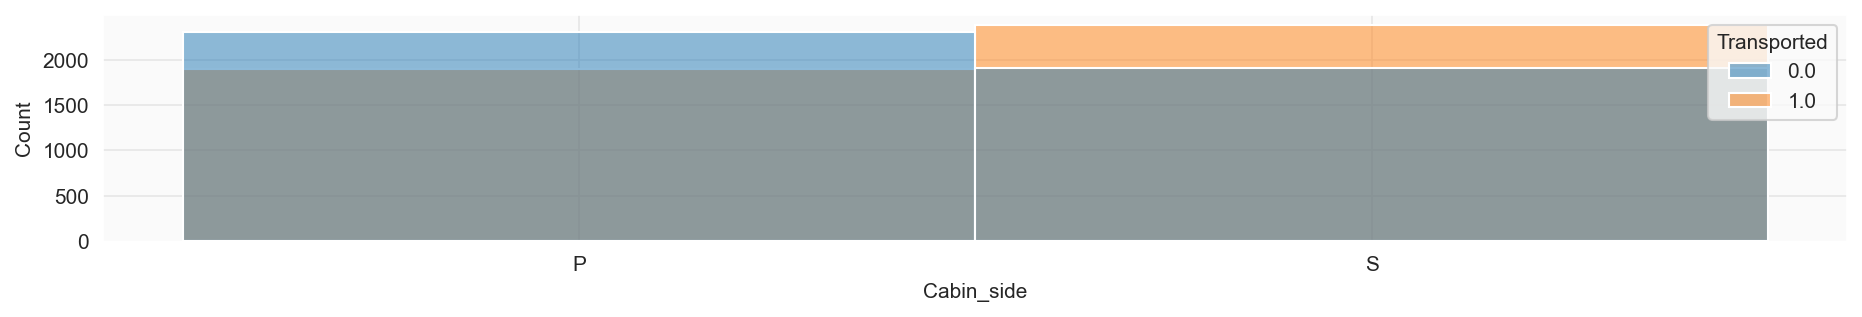

In [919]:
fig, ax = plt.subplots(figsize=(15,2), dpi=plot_dpi)
sns.histplot(x=data.Cabin_side, hue=data.Transported, palette='tab10');

Cabin_num

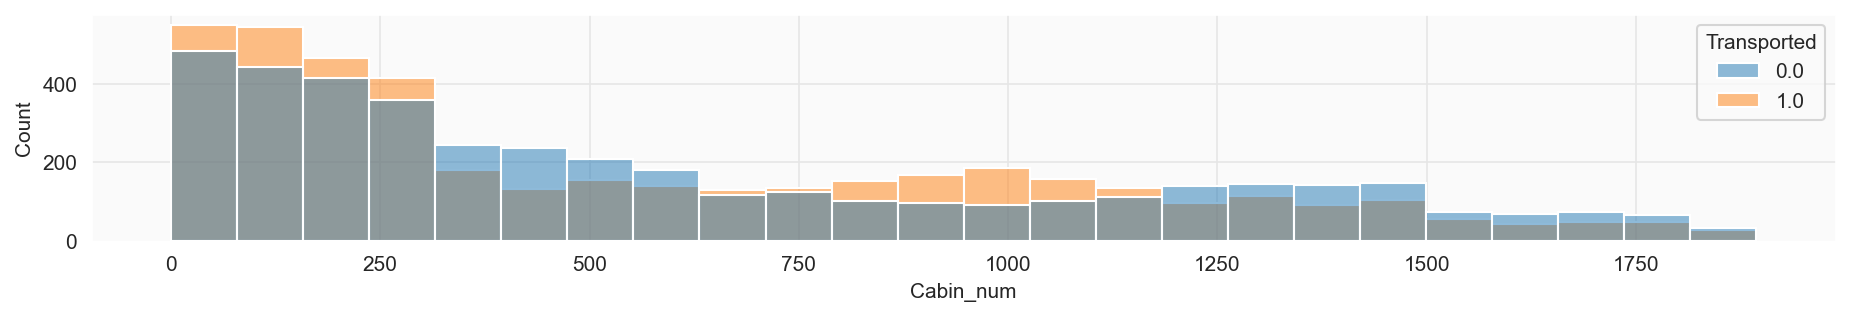

In [920]:
fig, ax = plt.subplots(figsize=(15,2), dpi=plot_dpi)
sns.histplot(x=data.Cabin_num, hue=data.Transported, palette='tab10');

### Name: extract Surname

In [921]:
data.Name = data.Name.fillna('_')    # временное заполнение NaN

data['Surname'] = data.Name.str.split(' ').str[1]

# data[['First_Name','Surname']] = data.Name.str.split(' ', expand=True)     # если потребуется обрабатывать (первое) имя

> Сам признак Surname малопригоден для модели, но с его помощью можно заполнить пропуски в других признаках.

> Family_size будет рассчитан после максимально возможного заполнения пропусков в Surname.

### PassengerId: extract Group

Выделение номера группы из идентификатора пассажира

In [922]:
data['Group'] = data.PassengerId.apply(lambda x: x.split('_')[0]).astype('int16')

> Сам признак Group малопригоден для модели, но с его помощью можно заполнить пропуски в других признаках.

## Заполнение и создание

Ввиду того, что пропуски "размазаны" по всем данным, очередность заполнения – нетривиальная задача.  
Кроме того, иногда процесс заполнения прерывается созданием нового признака.

Очередность определяется так, чтобы на каждом следующем этапе были как можно более полные требующиеся данные. Иногда первым выполняется более точный вариант.

### FILL Surname by Group

In [923]:
# # количество уникальных фамилий в группе
# data['Group_Surname_unique'] = data.groupby('Group').Surname.transform(lambda x: x.nunique())

In [924]:
# количество уникальных фамилий в группе
data.groupby('Group').Surname.transform(lambda x: x.nunique()).value_counts()

1    11404
2     1156
3      248
0      155
4        7
Name: Surname, dtype: int64

> Большиство групп содержат только 1 фамилию. Можно заполнить пропуски в Surname наиболее частым значением для конкретной группы.

In [925]:
# до заполнения пропусков
data.Surname.value_counts(dropna=False).head()

NaN           294
Belley         19
Buckentry      19
Casonston      18
Hinglendez     18
Name: Surname, dtype: int64

In [926]:
data.Surname = data.groupby('Group').Surname.transform(lambda x: x.fillna(x.value_counts().idxmax())
                                                                 if len(x.value_counts()) > 0 else np.NaN)

In [927]:
# после заполнения пропусков
data.Surname.value_counts(dropna=False).head()

NaN          155
Belley        19
Mclardson     19
Buckentry     19
Casonston     18
Name: Surname, dtype: int64

### FILL HomePlanet by Group

Проверка: есть ли группы, в которых пассажиры с разных планет

In [928]:
# первый способ: ответ – число строк
data.groupby(['Group','HomePlanet']).size().unstack().count(axis=1).to_frame().value_counts()

1    9124
dtype: int64

In [929]:
# второй способ: ответ – максимальное значение
data.groupby('Group').HomePlanet.nunique().sort_values(ascending=False).head(1)

Group
1    1
Name: HomePlanet, dtype: int64

> Нет ни одной группы, где были бы пассажиры с более чем одной планеты.
>
> Даже если это было бы не так, следующий ниже способ подходит, чтобы заполнить NaN наиболее частым значением в группе.

In [930]:
# до заполнения пропусков
data.HomePlanet.value_counts(dropna=False)

Earth     6865
Europa    3133
Mars      2684
NaN        288
Name: HomePlanet, dtype: int64

Пояснения к логике:  
- группируем по полю `Group`;
- выделяем поле `HomePlanet`, чтобы далее подсчитать количество пассажиров с разных планет в этой группе;
- если для группы есть непустые значения `if len(x.value_counts()) > 0`;
- подсчитываем частоту и берем наиболее частое (без учета NaN) `x.fillna(x.value_counts().idxmax())`;
- важно, что в Group нет пропусков.

In [931]:
data.HomePlanet = data.groupby('Group').HomePlanet.transform(lambda x: x.fillna(x.value_counts().idxmax())
                                                                       if len(x.value_counts()) > 0 else np.NaN)

In [932]:
# после заполнения пропусков
data.HomePlanet.value_counts(dropna=False)

Earth     6914
Europa    3175
Mars      2724
NaN        157
Name: HomePlanet, dtype: int64

### FILL HomePlanet by Surname

Проверка: есть ли фамилии, обладатели которых с разных планет

In [933]:
# первый способ: ответ – число строк
data.groupby(['Surname','HomePlanet']).size().unstack().count(axis=1).to_frame().value_counts()

1    2400
dtype: int64

In [934]:
# второй способ: ответ – максимальное значение
data.groupby('Surname').HomePlanet.nunique().sort_values(ascending=False).head(2)

Surname
Acobson    1
Panspic    1
Name: HomePlanet, dtype: int64

> Нет ни одной фамилии, обладатели которой были бы с разных планет.
>
> Даже если это было бы не так, следующий ниже способ подходит, чтобы заполнить NaN наиболее частым значением в группе.

In [935]:
# до заполнения пропусков
data.HomePlanet.value_counts(dropna=False)

Earth     6914
Europa    3175
Mars      2724
NaN        157
Name: HomePlanet, dtype: int64

Пояснения к логике:  
- группируем по полю `Surname` (`dropna=False` необходимо, чтобы отделить группу пассажиров с неизвестными фамилиями);
- выделяем поле `HomePlanet`, чтобы далее подсчитать количество пассажиров с разных планет в этой группе;
- если для группы есть непустые значения `if len(x.value_counts()) > 0`;
- подсчитываем частоту и берем наиболее частое (без учета NaN) `x.fillna(x.value_counts().idxmax())`.

**!!! ПОЛУРЕШЕННАЯ ПРОБЛЕМА**  
При группировке по Surname для группы Surname=NaN так же находится подходящая планета. Надо, чтобы для этой группы оставался HomePlanet=NaN. Пока использую костыль, но хорошо бы найти что-то более изящное.

In [936]:
# костыль
# предварительно сохраним индексы строк, в которых пропуски в HomePlanet и Surname (HomePlanet должно сохранить значение NaN)
restore = data.query('HomePlanet.isna() and Surname.isna()').index

In [937]:
data.HomePlanet = data.groupby('Surname', dropna=False).HomePlanet.transform(lambda x: x.fillna(x.value_counts().idxmax())
                                                                                       if len(x.value_counts()) > 0
                                                                                       else np.NaN
                                                                            )

In [938]:
# костыль
# восстановление NaN
data.loc[restore, 'HomePlanet'] = np.NaN

In [939]:
# после заполнения пропусков
data.HomePlanet.value_counts(dropna=False)

Earth     7011
Europa    3195
Mars      2751
NaN         13
Name: HomePlanet, dtype: int64

### FILL Cabin_deck by HomePlanet

In [940]:
# до заполнения пропусков
data.groupby(['Cabin_deck','HomePlanet']).size().unstack().T#.fillna(0)

Cabin_deck,A,B,C,D,E,F,G,T
HomePlanet,,,,,,,,
Earth,NaN,NaN,NaN,NaN,595.000,2475.000,3780.000,NaN
Europa,353.000,1141.000,1101.000,306.000,203.000,NaN,NaN,11.000
Mars,NaN,NaN,NaN,411.000,523.000,1759.000,NaN,NaN


> Некоторые палубы отведены под пассажиров с одной планеты. Пара палуб — под пассажиров с двух.  
> Пропуски `HomePlanet` для палуб, отведенных под пассажиров одной планеты, можно заполнить однозначно.

In [941]:
data.loc[(data.Cabin_deck.isin(list("ABCT"))) & (data.HomePlanet.isna()), 'HomePlanet'] = 'Europa'

In [942]:
data.loc[(data.Cabin_deck.isin(list("G"))) & (data.HomePlanet.isna()), 'HomePlanet'] = 'Earth'

In [943]:
# после заполнения пропусков
data.groupby(['Cabin_deck','HomePlanet']).size().unstack().T#.fillna(0)

Cabin_deck,A,B,C,D,E,F,G,T
HomePlanet,,,,,,,,
Earth,NaN,NaN,NaN,NaN,595.000,2475.000,3781.000,NaN
Europa,354.000,1141.000,1102.000,306.000,203.000,NaN,NaN,11.000
Mars,NaN,NaN,NaN,411.000,523.000,1759.000,NaN,NaN


### FILL Cabin_deck by Group

In [944]:
# на скольки палубах могут располагаться пассажиры из одной группы (индекс - количество палуб, значения - доля групп)
data.groupby('Group').Cabin_deck.nunique(dropna=False).sort_values(ascending=False).to_frame().value_counts(sort=False)

Cabin_deck
1             8490
2              741
3               46
4                3
dtype: int64

> Большинство групп расположены на одной Cabin_deck, реже на двух, крайне редко на 3 и 4.

In [945]:
# до замены
data.groupby('Cabin_deck', dropna=False).Group.size()

Cabin_deck
A       354
B      1141
C      1102
D       720
E      1323
F      4239
G      3781
T        11
NaN     299
Name: Group, dtype: int64

In [946]:
data.Cabin_deck = data.groupby('Group').Cabin_deck.transform(lambda x: x.fillna(x.value_counts().idxmax())
                                                                       if len(x.value_counts()) > 0 else np.NaN)

In [947]:
# после замены
data.groupby('Cabin_deck', dropna=False).Group.size()

Cabin_deck
A       361
B      1161
C      1122
D       730
E      1334
F      4267
G      3822
T        11
NaN     162
Name: Group, dtype: int64

### FILL Cabin_side by Group

In [948]:
# сколько разных Cabin_side может быть в одной группе, ответ – максимальное значение
data.groupby('Group').Cabin_side.nunique().sort_values(ascending=False).head(1)

Group
1    1
Name: Cabin_side, dtype: int64

> Все группы расположены строго на одной Cabin_side (макс. значение = 1).

In [949]:
# до заполнения пропусков
data.Cabin_side.value_counts(dropna=False)

S      6381
P      6290
NaN     299
Name: Cabin_side, dtype: int64

In [950]:
data.Cabin_side = data.groupby('Group').Cabin_side.transform(lambda x: x.fillna(x.value_counts().idxmax())
                                                                       if len(x.value_counts()) > 0 else np.NaN)

In [951]:
# после заполнения пропусков
data.Cabin_side.value_counts(dropna=False)

S      6454
P      6354
NaN     162
Name: Cabin_side, dtype: int64

### FILL Cabin_side by Surname

In [952]:
# доля фамилий, расположенных более чем на одной палубе
data.groupby(['Surname','Cabin_side']).size().unstack().query('P>0 and S>0').shape[0] / data.shape[0]

0.12582883577486506

> Доля фамилий, расположенных более чем на одной палубе, менее 13% (строго говоря, надо бы исключить путешественников-одиночек, но их доля очень мала).
>
> Можно с высокой точностью восстановить палубу по фамилии.

In [953]:
# до заполнения пропусков
data.Cabin_side.value_counts(dropna=False)

S      6454
P      6354
NaN     162
Name: Cabin_side, dtype: int64

In [954]:
# костыль
# предварительно сохраним индексы строк, в которых пропуски в Cabin_side и Surname (Cabin_side должно сохранить значение NaN)
restore = data.query('Cabin_side.isna() and Surname.isna()').index

In [955]:
data.Cabin_side = data.groupby('Surname', dropna=False).Cabin_side.transform(lambda x: x.fillna(x.value_counts().idxmax())
                                                                                       if len(x.value_counts()) > 0
                                                                                       else np.NaN
                                                                            )

In [956]:
# костыль
# восстановление NaN
data.loc[restore, 'Cabin_side'] = np.NaN

In [957]:
# после заполнения пропусков
data.Cabin_side.value_counts(dropna=False)

S      6534
P      6431
NaN       5
Name: Cabin_side, dtype: int64

> Оставшиеся NaN можно заполнить сначала одним значением и проверить модель, затем поменять значение и повторить.

In [958]:
data.Cabin_side = data.Cabin_side.fillna('S')

### FILL HomePlanet by [Destination, Cabin_deck]

In [959]:
data.query('HomePlanet.isna()')[['HomePlanet', 'Destination','Cabin_deck']]

,HomePlanet,Destination,Cabin_deck
2274,NaN,TRAPPIST-1e,D
2631,NaN,TRAPPIST-1e,F
3091,NaN,TRAPPIST-1e,F
4548,NaN,TRAPPIST-1e,F
5762,NaN,TRAPPIST-1e,F
8969,NaN,TRAPPIST-1e,E
10583,NaN,TRAPPIST-1e,D
11913,NaN,TRAPPIST-1e,E
12551,NaN,TRAPPIST-1e,F
12725,NaN,TRAPPIST-1e,D


> Оставшиеся NaN в HomePlanet – все с назначением на 'TRAPPIST-1e'.

In [960]:
data.groupby(['Destination','HomePlanet']).PassengerId.count()

Destination    HomePlanet
55 Cancri e    Earth         1000
               Europa        1341
               Mars           300
PSO J318.5-22  Earth         1085
               Europa          29
               Mars            70
TRAPPIST-1e    Earth         4778
               Europa        1769
               Mars          2314
Name: PassengerId, dtype: int64

> Среди направляющихся на 'TRAPPIST-1e', особенно на палубе E, преобладает Earth. На полубе D нет пассажиров с Earth.  
> На палубе D – пассажиров с Mars чуть больше, чем с Europa.

In [961]:
data.loc[(data.HomePlanet.isna()) & ~(data.Cabin_deck=='D'), 'HomePlanet'] = 'Earth'
data.loc[data.HomePlanet.isna(), 'HomePlanet'] = 'Mars'

### FILL Destination by mode() либо by HomePlanet

In [962]:
data.Destination.value_counts(dropna=False)

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
NaN               274
Name: Destination, dtype: int64

In [963]:
data.Destination = data.groupby('HomePlanet').Destination.transform(lambda x: x.fillna(x.mode()[0]))

In [964]:
# data.Destination = data.Destination.fillna(data.Destination.mode()[0])

In [965]:
data.Destination.value_counts(dropna=False)

TRAPPIST-1e      9145
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

> 'TRAPPIST-1e' – наиболее частое значение. Больше никаких полезных зависимостей не обнаружено.  
> Оба варианта (с группировкой и без) заполнения в данном случае приводят к одинаковому результату.

### FILL Cabin_deck by [HomePlanet, Destination]

In [966]:
# до замены
data.groupby('Cabin_deck', dropna=False).size()

Cabin_deck
A       361
B      1161
C      1122
D       730
E      1334
F      4267
G      3822
T        11
NaN     162
dtype: int64

In [967]:
data.groupby(['HomePlanet','Cabin_deck']).size().unstack().fillna(0).astype(int)

Cabin_deck,A,B,C,D,E,F,G,T
HomePlanet,,,,,,,,
Earth,0,0,0,0,601,2495,3822,0
Europa,361,1161,1122,309,204,0,0,11
Mars,0,0,0,421,529,1772,0,0


In [968]:
data.Cabin_deck = data.groupby(['HomePlanet','Destination']).Cabin_deck.transform(
                                                                            lambda x: x.fillna(x.value_counts().idxmax())
                                                                            if len(x.value_counts()) > 0 else np.NaN)

In [969]:
# после замены
data.groupby('Cabin_deck', dropna=False).size()

Cabin_deck
A     361
B    1189
C    1123
D     730
E    1334
F    4299
G    3923
T      11
dtype: int64

> Использование Destination почти ничего не меняет (1 изменение на момент написания), но.. пусть будет.

### FILL Cabin_num by [Group, Cabin_deck]

In [970]:
# до замены
data.query('Cabin_num.isna()').shape[0]

299

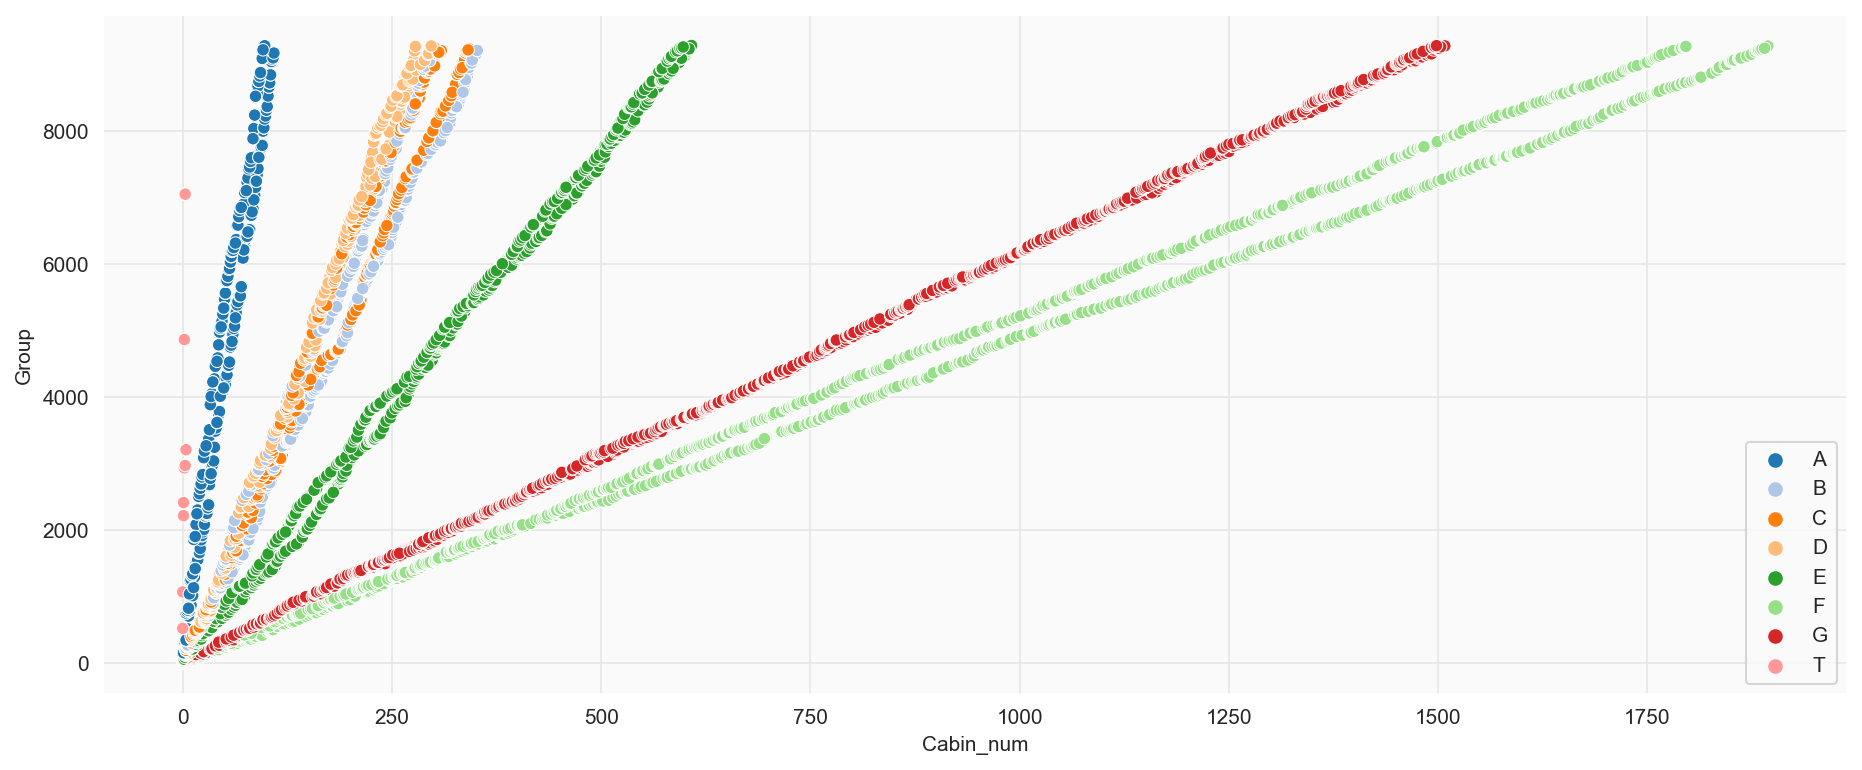

In [971]:
fig, ax = plt.subplots(figsize=(15,6), dpi=plot_dpi)
sns.scatterplot(x=data.Cabin_num, y=data.Group, hue=pd.Categorical(data.Cabin_deck, list('ABCDEFGT')), palette='tab20');

In [972]:
data[['Cabin_num','Group']].corr()

,Cabin_num,Group
Cabin_num,1.000,0.683
Group,0.683,1.000


> На каждой палубе группы заселяются в каюты примерно последовательно: номера кают увеличиваются для следующей группы. Это не строгая зависимость – есть колебания, но в целом тенденция линейная.  
> Далее номера кают будут поделены на группы, поэтому колебания станут еще менее существенными (какое-либо влияние колебаний может сказаться лишь на границах групп).

In [973]:
# Extrapolate linear relationship on a deck by deck basis
for deck in list('ABCDEFG'):  # палуба Т исключена, т.к. слишком мало наблюдений для создания модели
    # Features and labels
    X_train = data.query('Cabin_num.notna() and Cabin_deck == @deck').Group
    X_test  = data.query('Cabin_num.isna()  and Cabin_deck == @deck').Group
    Y_train = data.query('Cabin_num.notna() and Cabin_deck == @deck').Cabin_num
    
    # Linear regression
    model = LinearRegression().fit(X_train.values.reshape(-1, 1), Y_train)
    Y_pred = model.predict(X_test.values.reshape(-1, 1))
    
    # Fill missing values with predictions
    data.loc[(data['Cabin_num'].isna()) & (data['Cabin_deck']==deck),'Cabin_num'] = Y_pred.astype(int)

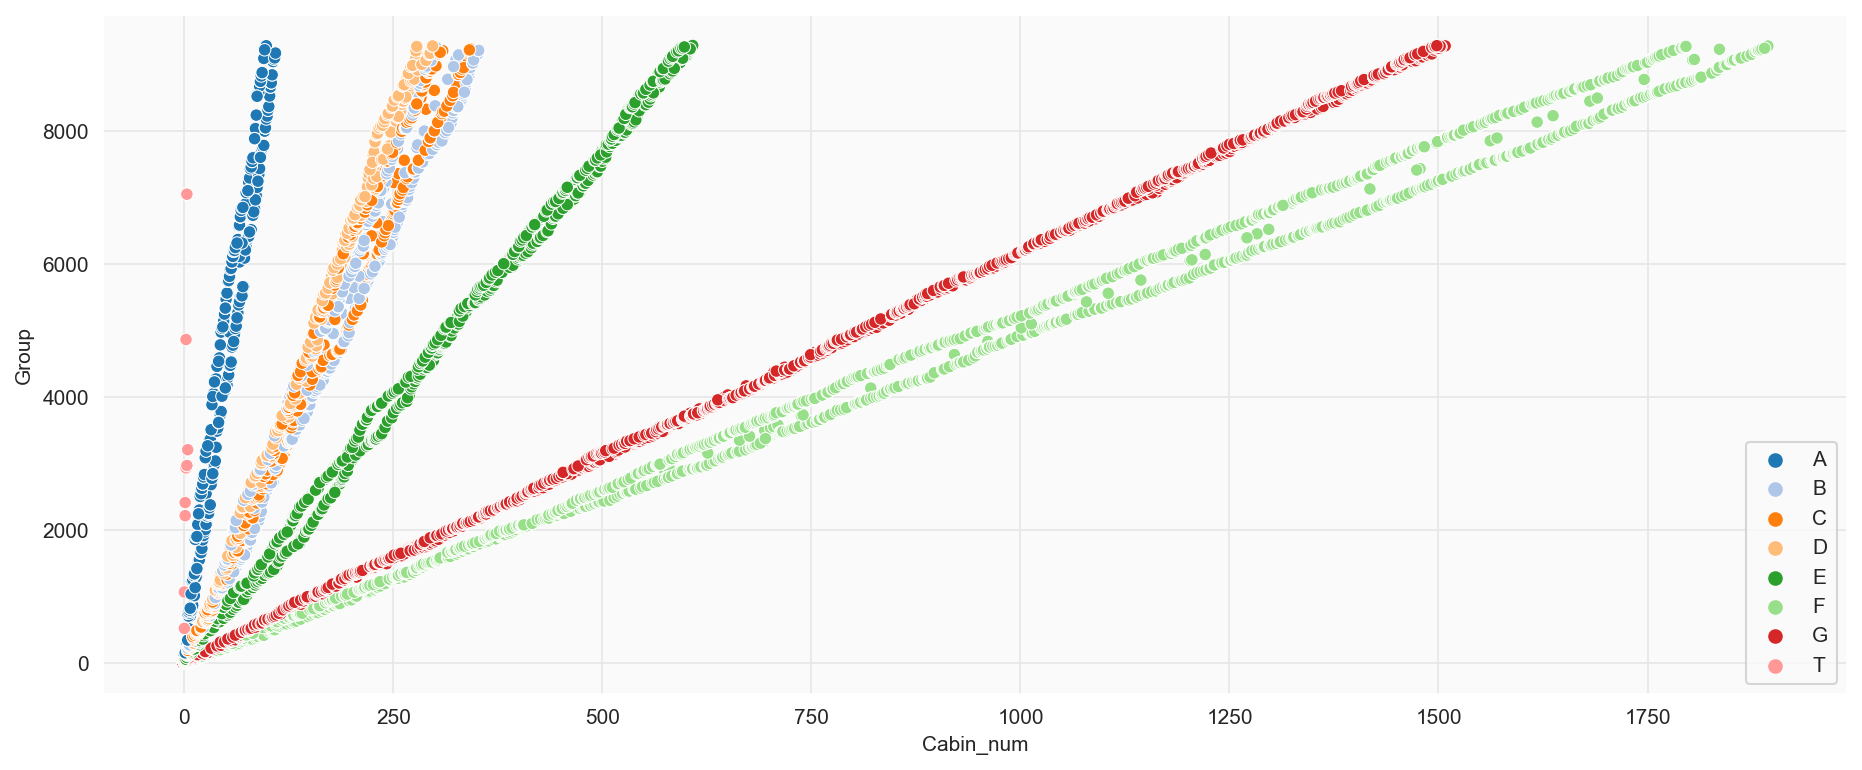

In [974]:
fig, ax = plt.subplots(figsize=(15,6), dpi=plot_dpi)
sns.scatterplot(x=data.Cabin_num, y=data.Group, hue=pd.Categorical(data.Cabin_deck, list('ABCDEFGT')), palette='tab20');

In [975]:
# после замены
data.query('Cabin_num.isna()').shape[0]

0

### FILL VIP by mode()

In [976]:
# до заполнения
data.VIP.value_counts(dropna=False)

0.000    12401
NaN        296
1.000      273
Name: VIP, dtype: int64

In [977]:
data.groupby(['CryoSleep','VIP']).size().unstack().assign(VIP_part = lambda x: x[1]/(x[0]+x[1]) )

VIP,0.0,1.0,VIP_part
CryoSleep,,,
0.000,7657,239,0.030
1.000,4449,28,0.006


> Среди VIP выше среди пассажиров без расходов (расчет был) и вне криосна. Но это никак не поможет ))
>
> Доля VIP настолько мала, что наиболее подходящим способом выглядит заполнение доминирующим значением.

In [978]:
data.VIP = data.VIP.fillna(0)

In [979]:
# после заполнения
data.VIP.value_counts(dropna=False)

0.000    12697
1.000      273
Name: VIP, dtype: int64

### NEW Cabin_num_group from Cabin_num

In [980]:
# укрупнение категорий

data['Cabin_num_group'] = np.select([data.Cabin_num < 300, data.Cabin_num < 600, data.Cabin_num < 900, data.Cabin_num < 1200,
                                     data.Cabin_num < 1500, data.Cabin_num < 1800, data.Cabin_num >= 1800],
                                    ['0300', '0600', '0900', '1200', '1500', '1800', '1800+'])

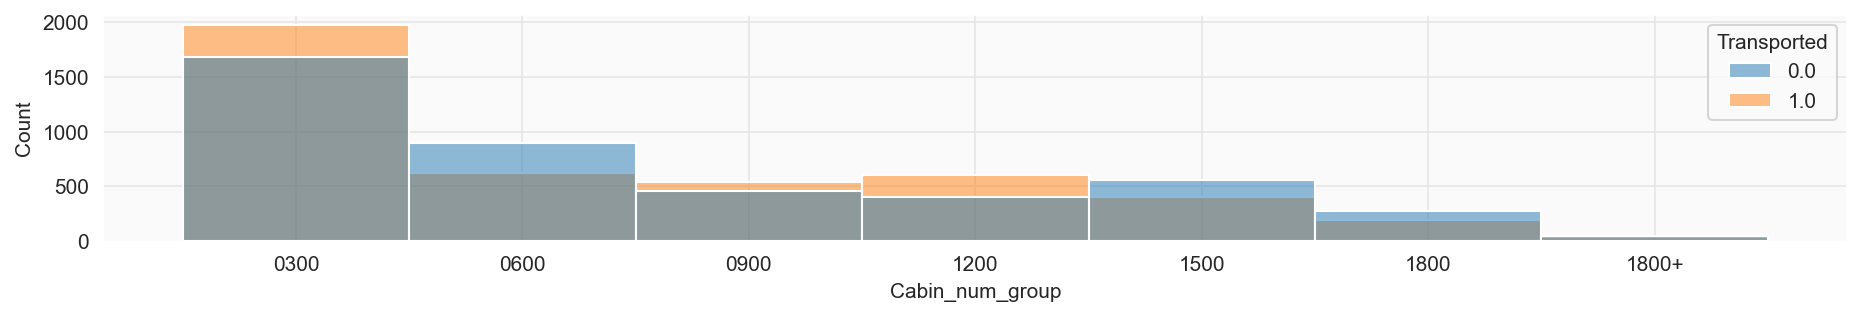

In [981]:
fig, ax = plt.subplots(figsize=(15,2), dpi=plot_dpi)
sns.histplot(x=data.Cabin_num_group, hue=data.Transported, palette='tab10');

### NEW Family_size from Surname

In [982]:
data['Family_size'] = data.groupby('Surname').Surname.transform(lambda x: x.value_counts()[0])

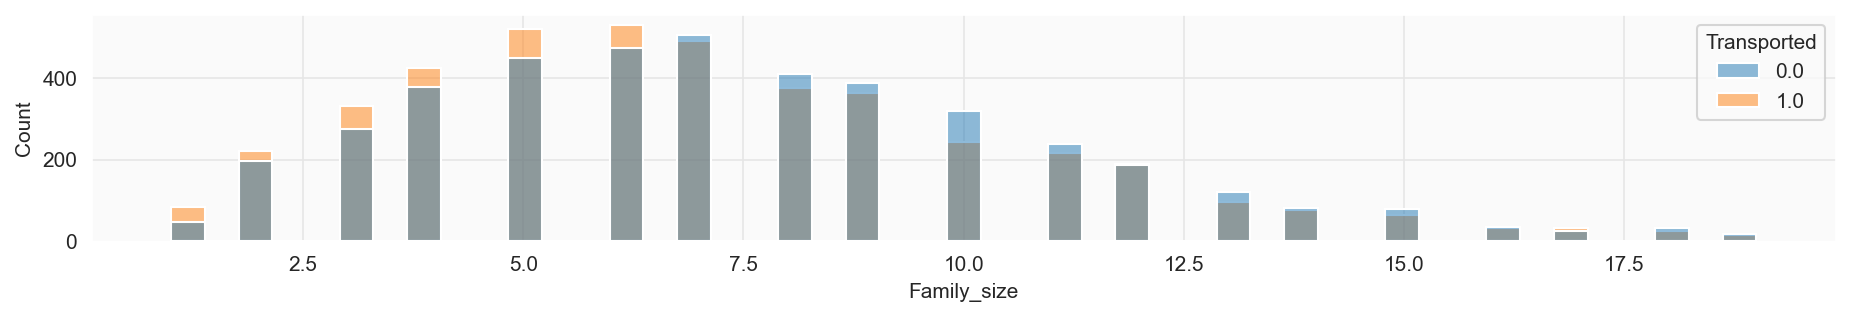

In [983]:
fig, ax = plt.subplots(figsize=(15,2), dpi=plot_dpi)
sns.histplot(x=data.Family_size, hue=data.Transported, palette='tab10');

> Теперь нужно заполнить пропуски в Family_size, которые появились из-за пропусков в Name.
>
> Заполнение пропусков сделано с учетом ряда полей. Предварительно выполнена проверка, для каких полей Family_size может варьироваться.

In [984]:
# проверка полей, с которыми может коррелировать Family_size

fields = ['HomePlanet','Destination','VIP','Cabin_deck']

for column in fields:
    display(data.pivot_table(columns=column, values='Family_size', aggfunc='median'))

HomePlanet,Earth,Europa,Mars
Family_size,8.000,5.000,6.000


Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Family_size,6.000,8.000,7.000


VIP,0.000,1.000
Family_size,7.000,5.000


Cabin_deck,A,B,C,D,E,F,G,T
Family_size,5.000,5.000,5.000,6.000,7.000,7.000,8.000,3.000


In [985]:
# до замены
data.query('Family_size.isna()').shape[0]

155

In [986]:
data.Family_size = data.groupby(fields).Family_size.transform(lambda x: x.fillna(x.median()))

In [987]:
# после замены
data.query('Family_size.isna()').shape[0]

0

###  NEW is_spents from spents

In [846]:
data['is_spents'] = ((data.RoomService > 0) | (data.FoodCourt > 0) | (data.ShoppingMall > 0) |
                     (data.Spa > 0) | (data.VRDeck > 0)).astype('int8')

### FILL CryoSleep by is_spents

In [847]:
# до заполнения
data.query('CryoSleep.isna()').shape[0]

310

In [848]:
data.groupby(['is_spents','CryoSleep']).size().unstack().fillna(0).astype(int)

CryoSleep,0.000,1.000
is_spents,,
0,740,4581
1,7339,0


> Если пассажир спит, то он не тратил – 100%. Если не тратил, то скорее всего спит – 86%. Если не спит, то скорее всего тратил – 91%.
>
> Пропуски в CryoSleep можно заполнить, исходя из того, тратил ли пассажир. Предполагаемая точность – 86%.  
> *На данный момент пропуски в тратах заполнены нулями, что увеличивает погрешность.*

In [849]:
data.CryoSleep = np.select([data.is_spents > 0, data.is_spents == 0], [0, 1])

In [850]:
# после заполнения
data.query('CryoSleep.isna()').shape[0]

0

### FILL Age by [...]

In [851]:
# до заполнения
data.query('Age.isna()').shape[0]

270

In [852]:
# проверка полей, с которыми может коррелировать возраст

fields = ['HomePlanet','Destination','VIP','Family_size']

for column in fields:
    display(data.pivot_table(columns=column, values='Age', aggfunc='median'))

HomePlanet,Earth,Europa,Mars
Age,23.000,33.000,28.000


Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Age,28.000,24.000,27.000


VIP,0.000,1.000
Age,26.000,33.000


Family_size,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000,13.000,14.000,15.000,16.000,17.000,18.000,19.000
Age,33.000,30.000,30.000,29.000,28.000,27.000,26.000,25.000,25.000,24.000,27.000,23.000,24.000,24.000,21.000,24.000,21.000,19.000,21.000


> Проверенные поля более-менее коррелируют с Age

In [853]:
na_index = data.query('Age.isna()').index

In [854]:
data.Age = data.groupby(fields).Age.transform(lambda x: x.fillna(x.median()))

In [855]:
# можно посмотреть, насколько избирательным было заполнение
# data.iloc[na_index].groupby(fields).Age.median()

In [856]:
# после заполнения
data.query('Age.isna()').shape[0]

0

### FILL spent_fields by CryoSleep

In [857]:
spent_fields = ['FoodCourt','ShoppingMall','RoomService','Spa','VRDeck']

In [858]:
# до заполнения
data[spent_fields].isna().sum().sum()

1410

In [859]:
for field in spent_fields:
    data[field] = data[field].mask((data[field].isna()) & (data.CryoSleep == 1), 0)

In [860]:
# после заполнения
data[spent_fields].isna().sum().sum()

788

> Если пассажир спит, значит не тратит.

### FILL spent_fields by [...]

In [861]:
spent_fields = ['FoodCourt','ShoppingMall','RoomService','Spa','VRDeck']

In [862]:
# до заполнения
data[spent_fields].isna().sum().sum()

788

In [863]:
# проверка полей, с которыми могут коррелировать spents

fields = ['HomePlanet','Destination','VIP','Family_size']

for field in spent_fields:
    print(f'{CR}{CR}{f.BOLD}=== {field} ==={f.END}')
    for column in fields:
        display(data.query('CryoSleep == 0').pivot_table(columns=column, values=field, aggfunc='mean'))



=== FoodCourt ===


HomePlanet,Earth,Europa,Mars
FoodCourt,230.652,2854.478,102.118


Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
FoodCourt,1671.540,284.964,612.193


VIP,0.000,1.000
FoodCourt,738.426,2055.386


Family_size,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000,13.000,14.000,15.000,16.000,17.000,18.000,19.000
FoodCourt,2121.551,1633.016,1347.217,1282.565,1017.723,712.208,650.654,554.574,399.947,317.523,307.890,537.742,538.617,503.433,262.881,223.250,273.818,331.694,247.583




=== ShoppingMall ===


HomePlanet,Earth,Europa,Mars
ShoppingMall,212.643,272.027,593.622


Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
ShoppingMall,301.945,244.741,306.905


VIP,0.000,1.000
ShoppingMall,300.872,312.442


Family_size,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000,13.000,14.000,15.000,16.000,17.000,18.000,19.000
ShoppingMall,341.808,375.876,313.392,326.258,342.779,264.925,309.018,314.291,237.099,295.017,245.262,359.901,314.778,205.318,259.436,257.091,248.788,183.378,159.778




=== RoomService ===


HomePlanet,Earth,Europa,Mars
RoomService,218.570,265.791,1002.403


Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
RoomService,372.523,200.141,407.082


VIP,0.000,1.000
RoomService,379.323,556.715


Family_size,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000,13.000,14.000,15.000,16.000,17.000,18.000,19.000
RoomService,301.340,460.082,431.584,449.800,404.699,358.927,430.919,349.321,385.512,352.839,459.356,261.482,198.805,350.849,189.642,414.339,263.294,212.889,179.111




=== Spa ===


HomePlanet,Earth,Europa,Mars
Spa,225.906,1652.004,199.204


Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Spa,971.380,243.857,454.012


VIP,0.000,1.000
Spa,514.671,1067.813


Family_size,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000,13.000,14.000,15.000,16.000,17.000,18.000,19.000
Spa,970.172,1049.247,851.603,739.963,648.657,532.796,393.244,393.210,415.204,362.138,317.534,346.715,446.155,504.510,179.252,202.464,103.559,189.472,209.519




=== VRDeck ===


HomePlanet,Earth,Europa,Mars
VRDeck,222.765,1740.145,90.170


Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
VRDeck,991.196,300.848,438.711


VIP,0.000,1.000
VRDeck,501.012,1378.176


Family_size,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000,13.000,14.000,15.000,16.000,17.000,18.000,19.000
VRDeck,987.646,1204.076,935.646,681.458,660.247,481.841,437.004,399.186,346.264,331.503,225.242,369.996,368.904,351.355,260.513,255.036,234.441,174.351,228.269


In [864]:
na_index = data.query('ShoppingMall.isna()').index

In [865]:
# Из-за большого количества нулевых значений вместо median() ипользуется mean()

for field in spent_fields:
    data[field] = data.groupby(fields)[field].transform(lambda x: x.fillna(x.mean()))

In [866]:
# можно посмотреть, насколько избирательным было заполнение
# data.iloc[na_index].groupby(fields).ShoppingMall.median()

In [867]:
# после заполнения
data[spent_fields].isna().sum().sum()

2

In [868]:
# подчистка оставшихся NaN по упрощенной схеме

for field in spent_fields:
    data[field] = data.groupby('HomePlanet')[field].transform(lambda x: x.fillna(x.mean()))

In [869]:
# после заполнения
data[spent_fields].isna().sum().sum()

0

###  NEW Food_Shopping, Room_Spa_Deck, Total_spents from spent_fields

Разные расходы отличаются распределением (с учетом целевого признака Transported). В новых полях Food_Shopping, Room_Spa_Deck объединены расходы со схожими распределениями.

Для того, чтобы нивелировать скошенность распределений и сделать их ближе к нормальному, выполнено логарифмирование расходов.

In [870]:
data['Food_Shopping'] = data[['FoodCourt','ShoppingMall']].sum(axis=1)
data['Room_Spa_Deck'] = data[['RoomService','Spa','VRDeck']].sum(axis=1)
data['Total_spents'] = data[['FoodCourt','ShoppingMall','RoomService','Spa','VRDeck']].sum(axis=1)

In [871]:
# Логарифмирование денежных расходов, чтобы распределение более походило на нормальное.

log_fields = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Food_Shopping','Room_Spa_Deck','Total_spents']

data[log_fields] = np.select(
                             [data[log_fields]==0, data[log_fields] > 0],
                             [0, np.log(data[log_fields])]
                            )

###  Итог заполнения пропусков

In [872]:
data.isna().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
Cabin                 0
Destination           0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Name                  0
Transported        4277
Cabin_deck            0
Cabin_num             0
Cabin_side            0
Surname             155
Group                 0
Cabin_num_group       0
Family_size           0
is_spents             0
Food_Shopping         0
Room_Spa_Deck         0
Total_spents          0
dtype: int64

### IterativeImputer

Использовался на начальном этапе до индивидуального заполнения пропусков в каждом признаке. И, возможно, для числовых признаков справлялся не хуже.

In [873]:
# # imputer = IterativeImputer(initial_strategy='mean', min_value=0, random_state=RS)
# imputer = IterativeImputer(initial_strategy='mean', random_state=RS)

In [874]:
# cat_fields_list = data.select_dtypes(exclude=np.number).columns.to_list()
# num_fields_list = data.select_dtypes(include=np.number).columns.to_list()
# num_fields_list.remove('Transported')

In [875]:
# data_num = pd.DataFrame(imputer.fit_transform(data[num_fields_list]), columns=num_fields_list)
# data_cat = data[cat_fields_list]

# data = pd.concat([data_cat, data_num, data['Transported']], axis=1)

## Feature Engineering

### NEW Earth_TRAPPIST from [HomePlanet, Destination]

In [876]:
data.groupby(['HomePlanet','Destination']).Transported.mean()

HomePlanet  Destination  
Earth       55 Cancri e     0.503
            PSO J318.5-22   0.501
            TRAPPIST-1e     0.390
Europa      55 Cancri e     0.692
            PSO J318.5-22   0.737
            TRAPPIST-1e     0.636
Mars        55 Cancri e     0.612
            PSO J318.5-22   0.451
            TRAPPIST-1e     0.515
Name: Transported, dtype: float64

In [877]:
data['Earth_TRAPPIST'] = ((data.HomePlanet == 'Earth') & (data.Destination == 'TRAPPIST-1e')).astype('int8')

> Путешествующие с Earth на TRAPPIST заметно реже телепортировались, чем просто с Земли или на Траппист.

### Перекодирование HomePlanet

Замена на предполагаемый порядковый номер загрузки. Влияние на результат неочевидно, надо посмотреть.

In [878]:
# data.HomePlanet = data.HomePlanet.map({'Earth':1, 'Mars':2, 'Europa':3}).astype('int8')

### NEW Age_group from Age

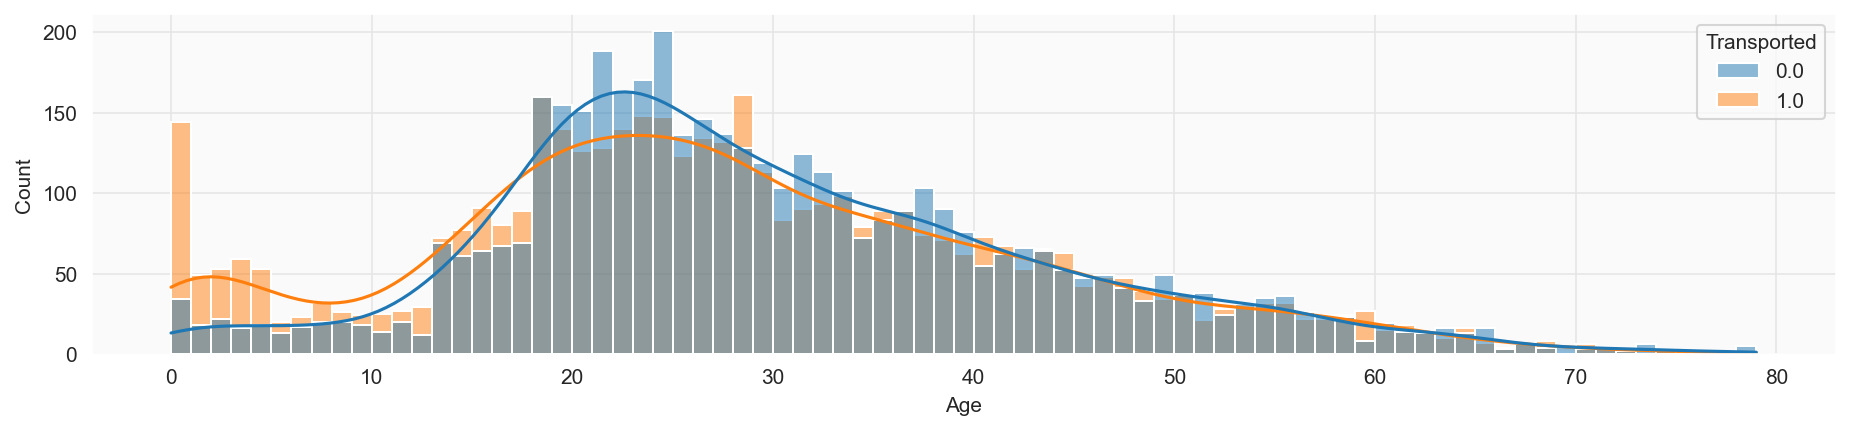

In [879]:
fig, ax = plt.subplots(figsize=(15,3), dpi=plot_dpi)
sns.histplot(x=data.Age, hue=data.Transported, binwidth=1, kde=True, palette='tab10');

In [880]:
data['Age_group'] = np.select([data.Age <= 12, data.Age <= 17, data.Age <= 18, data.Age <= 26,
                               data.Age <= 28, data.Age <= 33, data.Age > 33],
                            # ['12', '17', '18', '26', '28', '33', '33+'])
                              [6, 15, 18, 22, 27, 31, 50])

> Похожий результат, если просто отделить 18 (или 12) лет.

> Можно категориальные группы дополнительно закодировать MeanEncoder() или вручную посчитать среднее значение (через groupby и transform). 

### NEW Group_Alone from Group

In [881]:
data['Group_size'] = data.groupby('Group').PassengerId.transform(lambda df: len(df)).astype('int8')

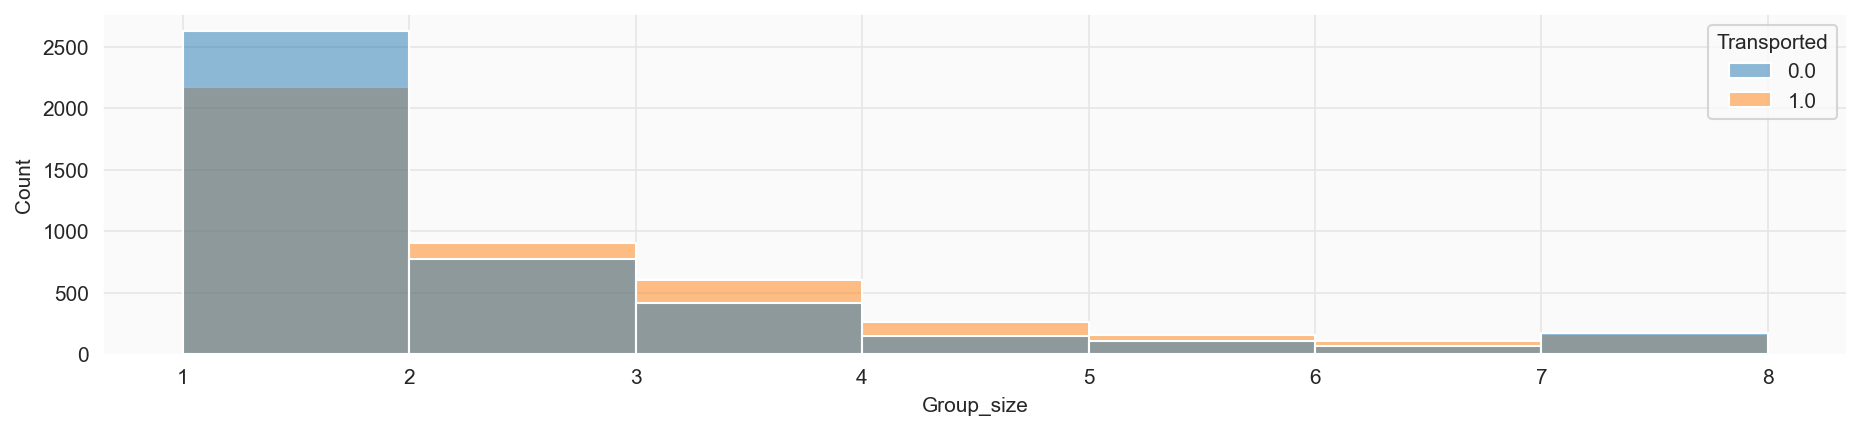

In [882]:
fig, ax = plt.subplots(figsize=(15,3), dpi=plot_dpi)
sns.histplot(x=data.Group_size, hue=data.Transported, binwidth=1, palette='tab10');

In [883]:
data['Group_Alone'] = (data.Group_size == 1).astype('int8')
data = data.drop('Group_size', axis=1)

### NEW Group_Transported from Group

In [884]:
data['GC'] = pd.qcut(data.Group, q=41, labels=False)

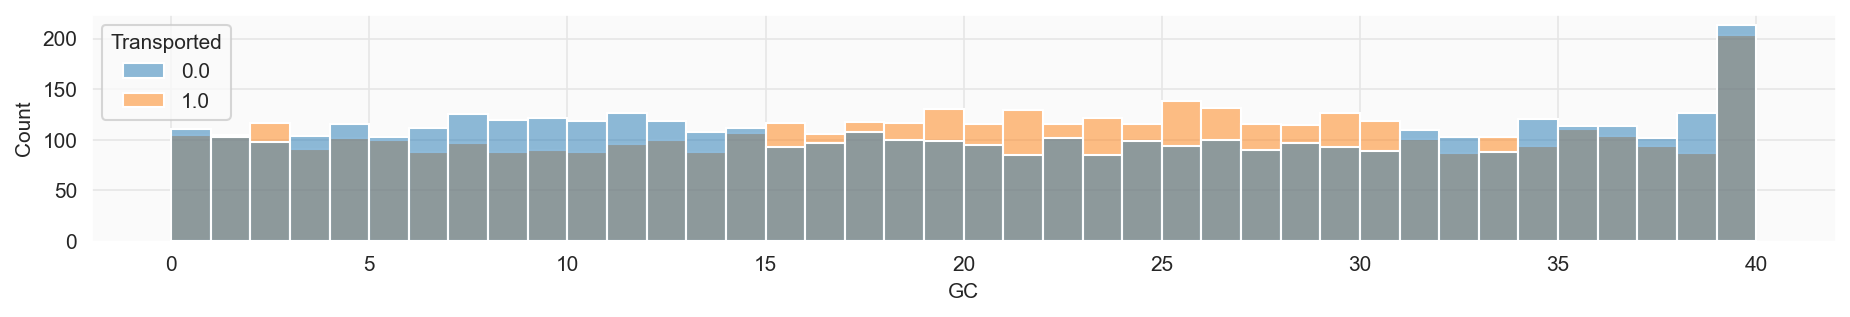

In [885]:
fig, ax = plt.subplots(figsize=(15,2), dpi=plot_dpi)
sns.histplot(x=data.GC, hue=data.Transported, bins=40, palette='tab10');

> В определенном диапазоне групп наблюдается повышенная доля транспортированных, в двух других – наоборот.

In [886]:
data['GC'] = pd.qcut(data.Group, q=[0, 0.375, 0.775, 1.0], labels=False)

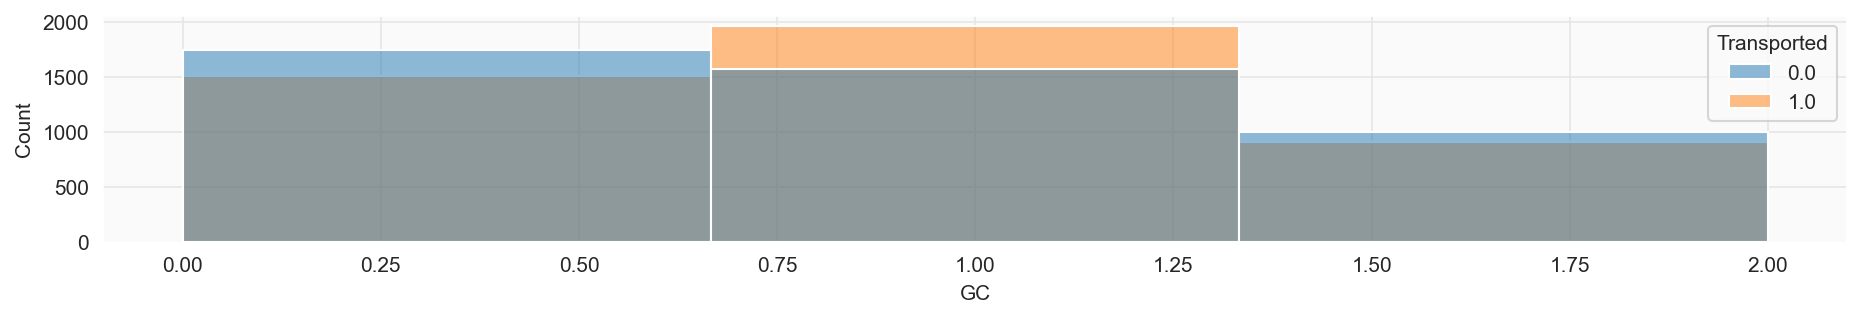

In [887]:
fig, ax = plt.subplots(figsize=(15,2), dpi=plot_dpi)
sns.histplot(x=data.GC, hue=data.Transported, bins=3, palette='tab10');

In [888]:
data['Group_Transported'] = np.select([data.GC == 0, data.GC == 1, data.GC == 2], [0, 1, 0])
data = data.drop('GC', axis=1)

### NEW Spents_kinds_count from spent_fields

Вроде, не лучше, чем просто `is_spents`.

In [889]:
# data['Services_count'] = (
#                               np.ceil(data.RoomService / 1e9) + 
#                               np.ceil(data.FoodCourt / 1e9) +
#                               np.ceil(data.ShoppingMall / 1e9) +
#                               np.ceil(data.Spa / 1e9) +
#                               np.ceil(data.VRDeck / 1e9)
#                              ).astype('int8')

## Обратное разделение на train и test

Общая обработка завершена, можно обрано разделить на train и test.

In [890]:
data_test = data.query('Transported.isna()')
data_train = data.query('Transported.notna()')

## Запись обработанных данных для следующего этапа

Создание и исследование модели выполнено в отдельном файле.

In [891]:
data_train.to_csv(f'datasets/data_train.csv', index=False)
data_test.to_csv(f'datasets/data_test.csv', index=False)

## Графики

Лучше перенести в разделы, где обрабатываются соответствующие признаки.

### Распределение признаков с учетом `Transported`

#### Графики распределений категориальных признаков

In [892]:
# временная таблица без лишних полей

# df = data_train.select_dtypes(exclude=[np.number]).drop(['Name','PassengerId','Cabin'], axis=1).copy()
obj_fields = data_train.select_dtypes(exclude=[np.number]).columns.to_list() + ['Transported']
df = data_train[obj_fields].drop(['PassengerId','Name','Surname','Cabin'], axis=1).copy()

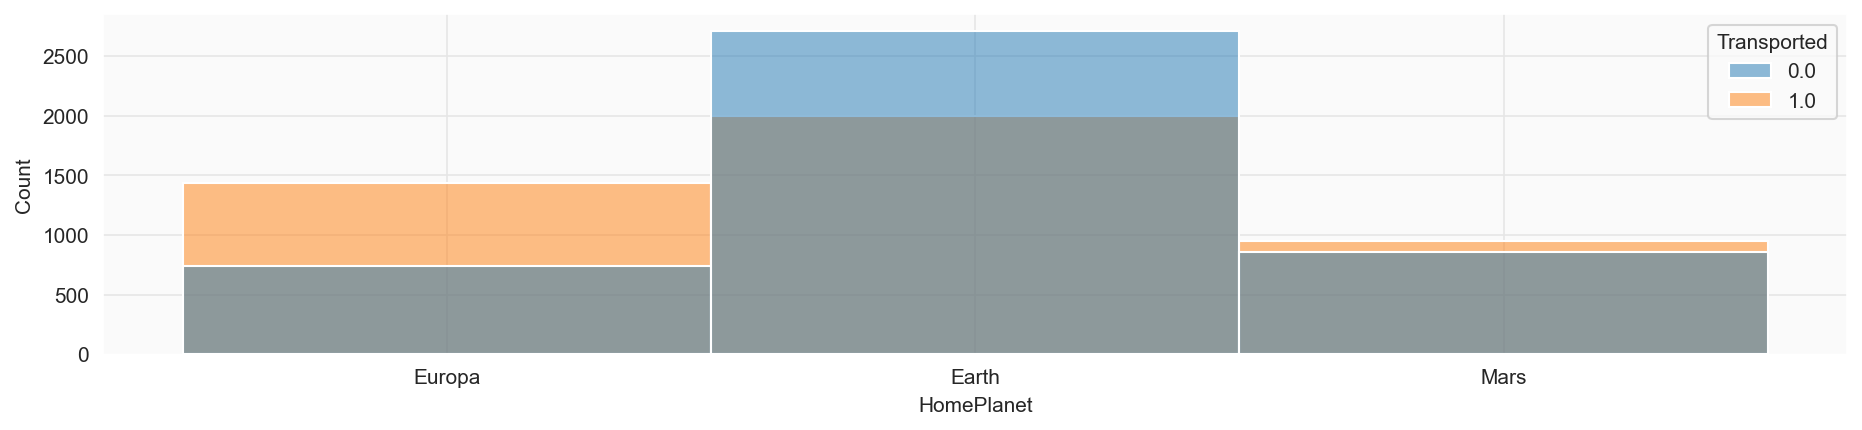

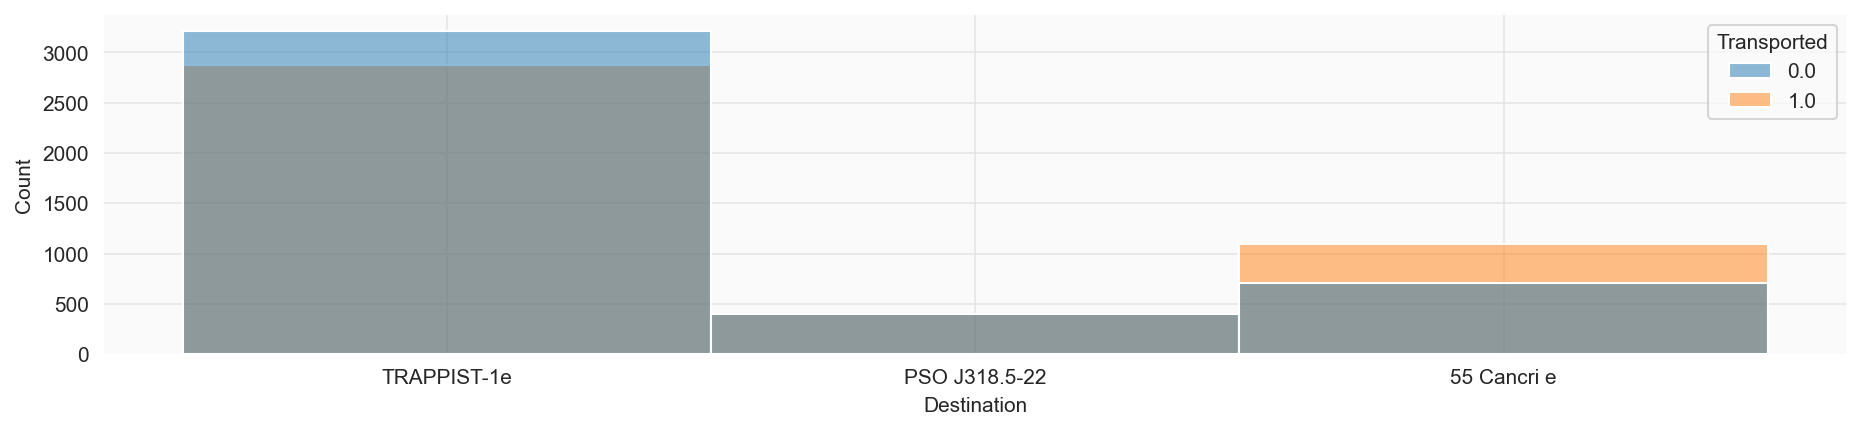

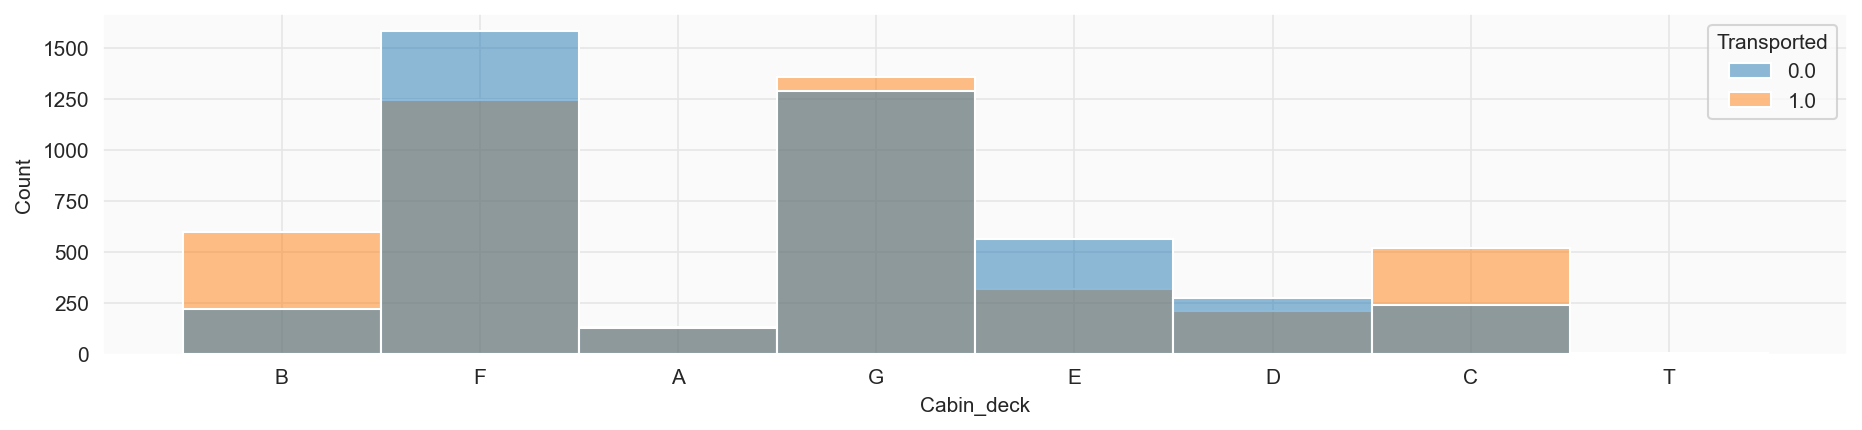

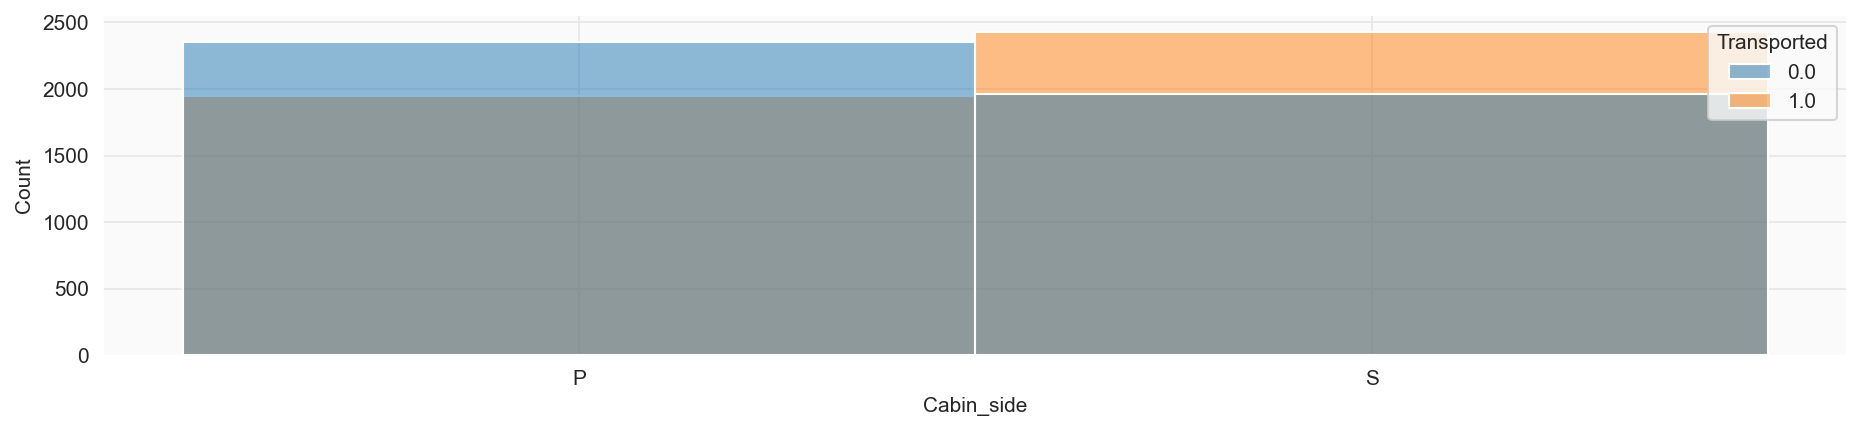

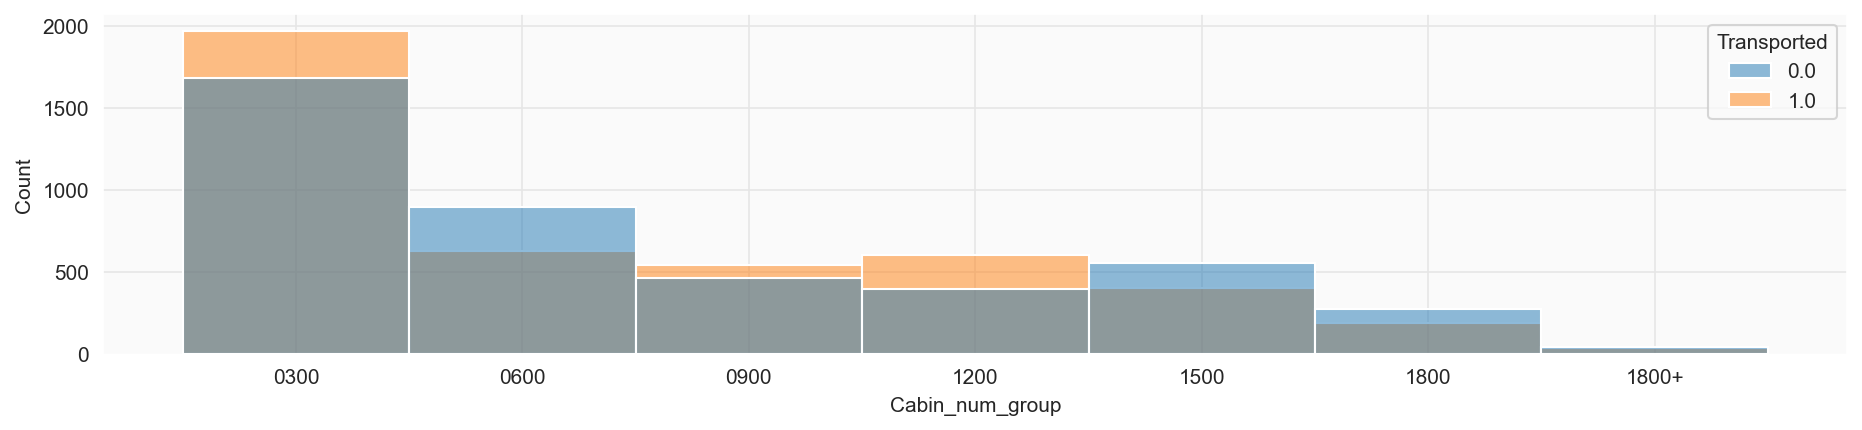

In [893]:
for column in df.drop('Transported', axis=1).columns:
    fig, ax = plt.subplots(figsize=(15,3), dpi=plot_dpi)
    sns.histplot(x=df[column], hue=df.Transported);

#### Графики распределений количественных признаков

In [894]:
# временная таблица без лишних полей
num_fields = data_train.select_dtypes(include=[np.number]).columns.to_list()
df = data_train[num_fields]

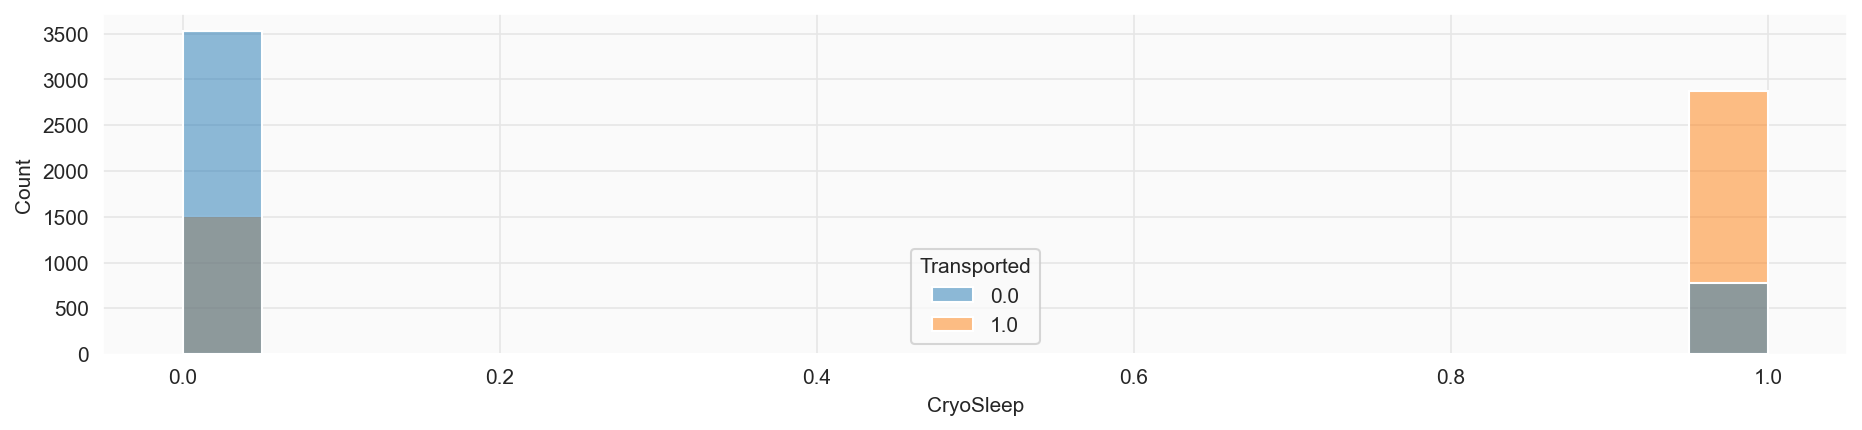

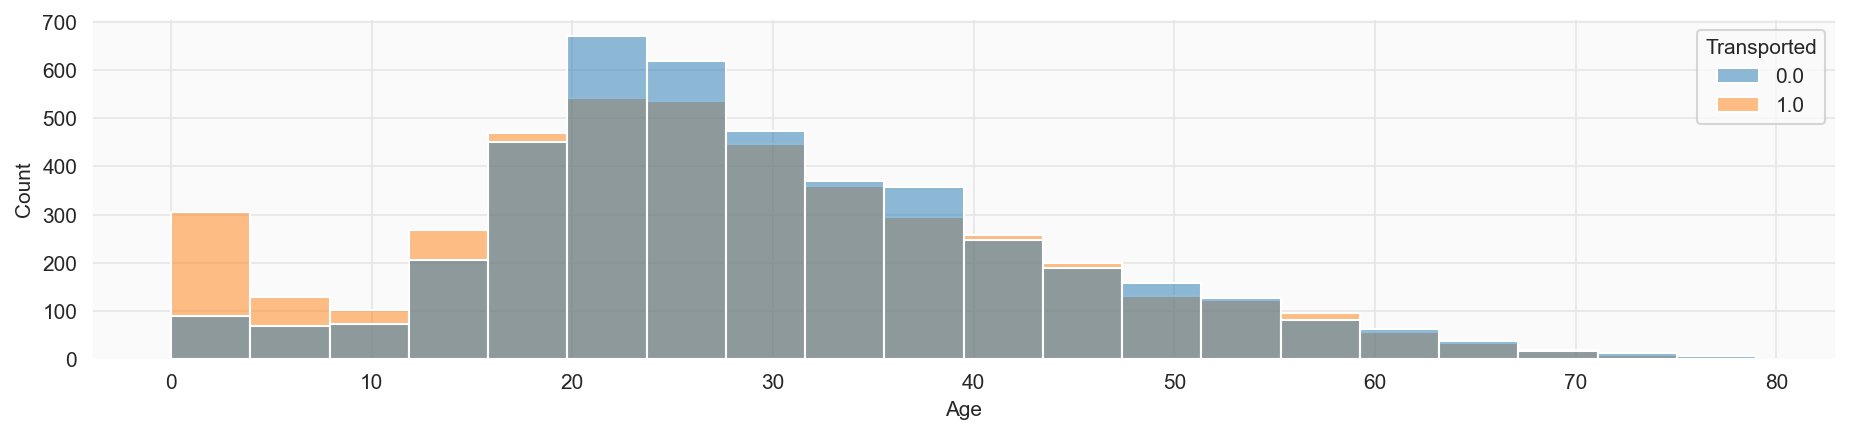

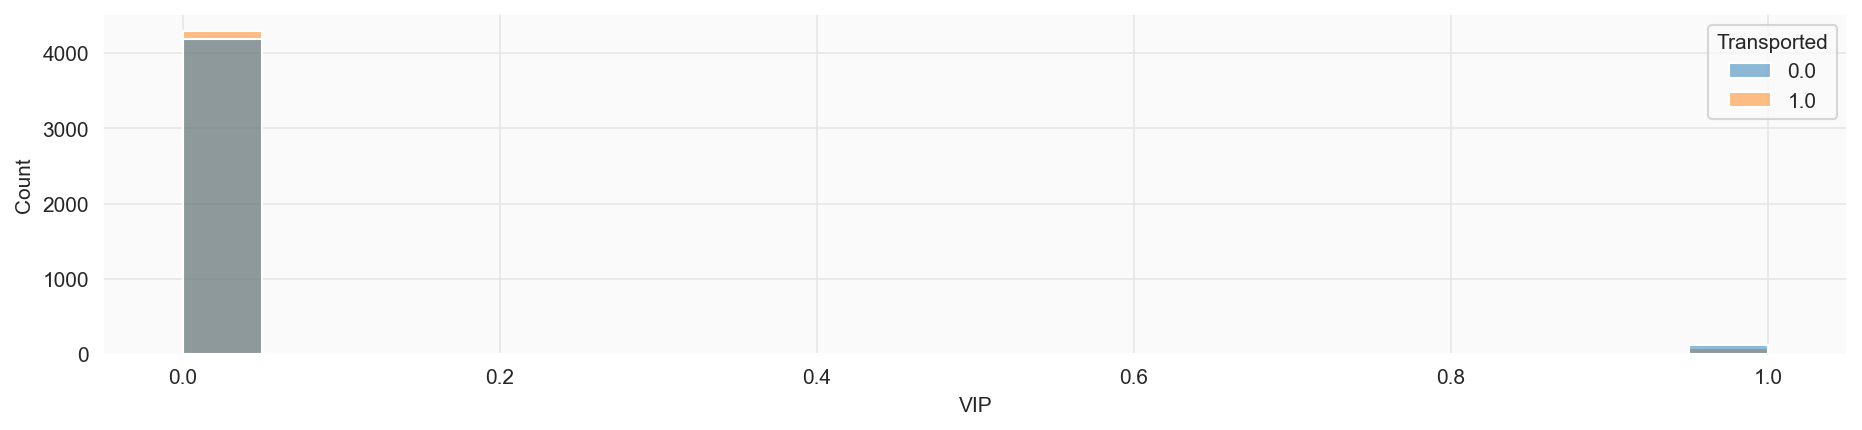

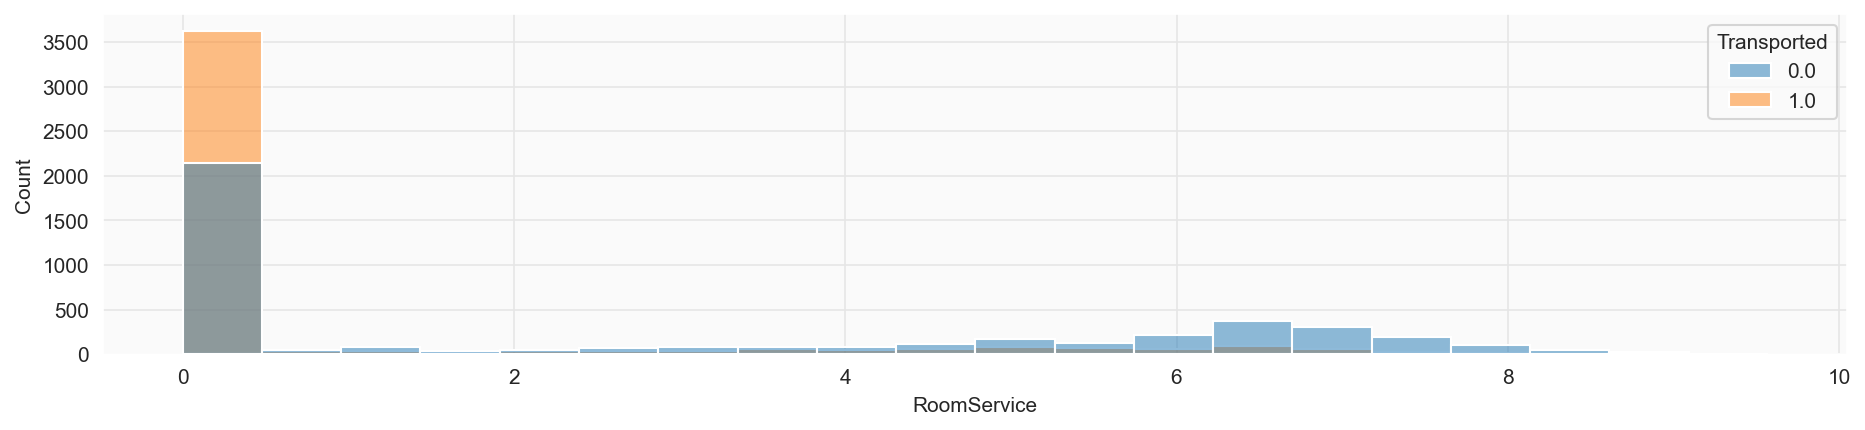

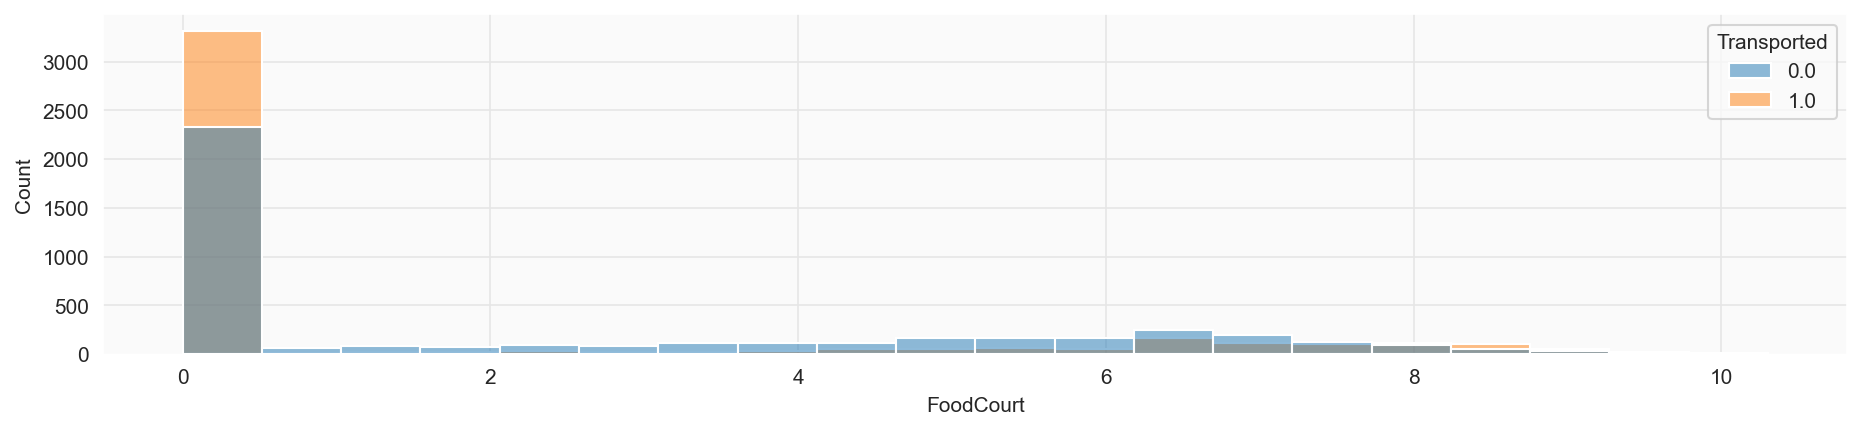

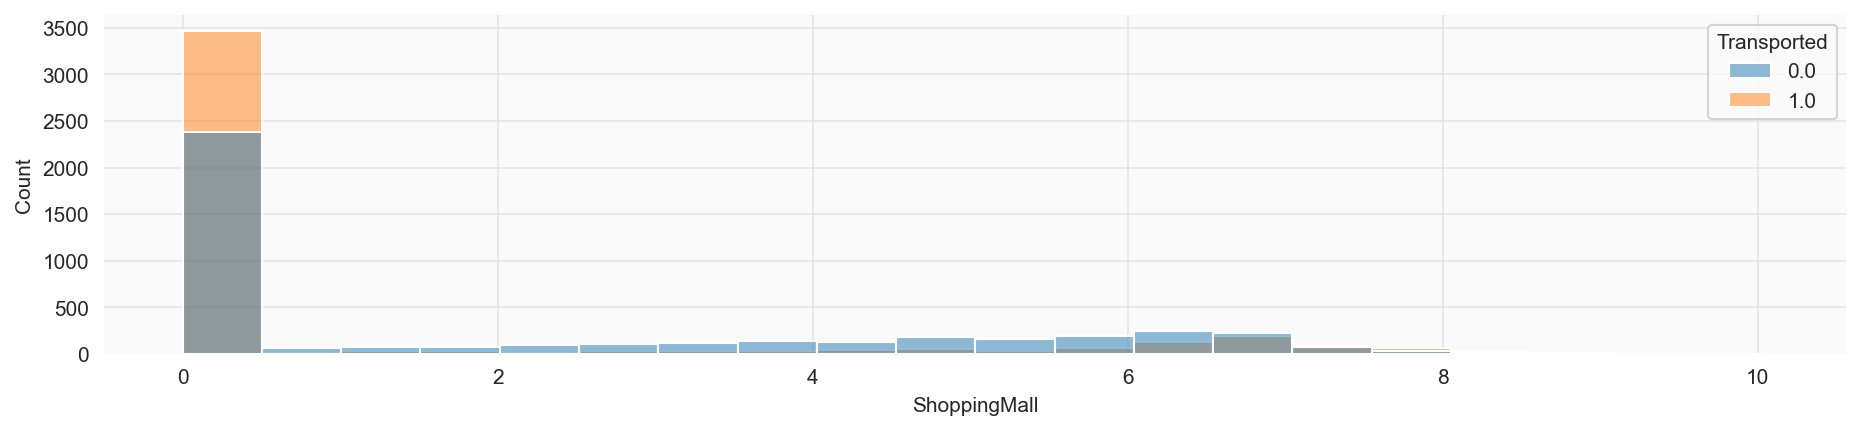

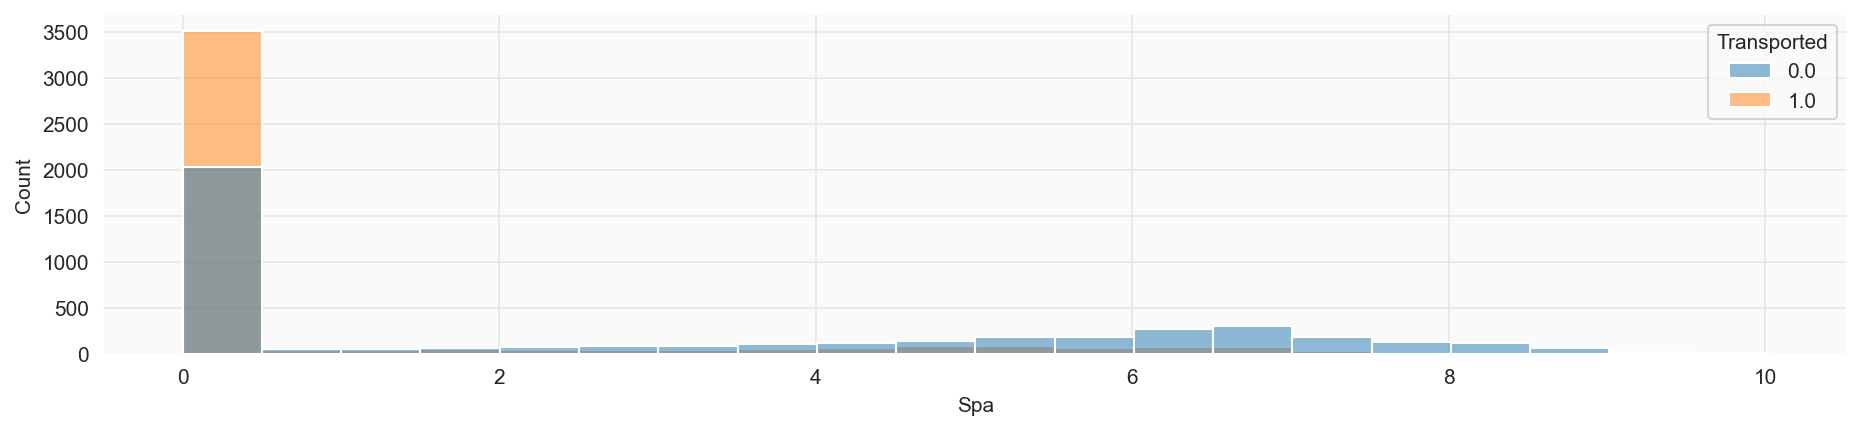

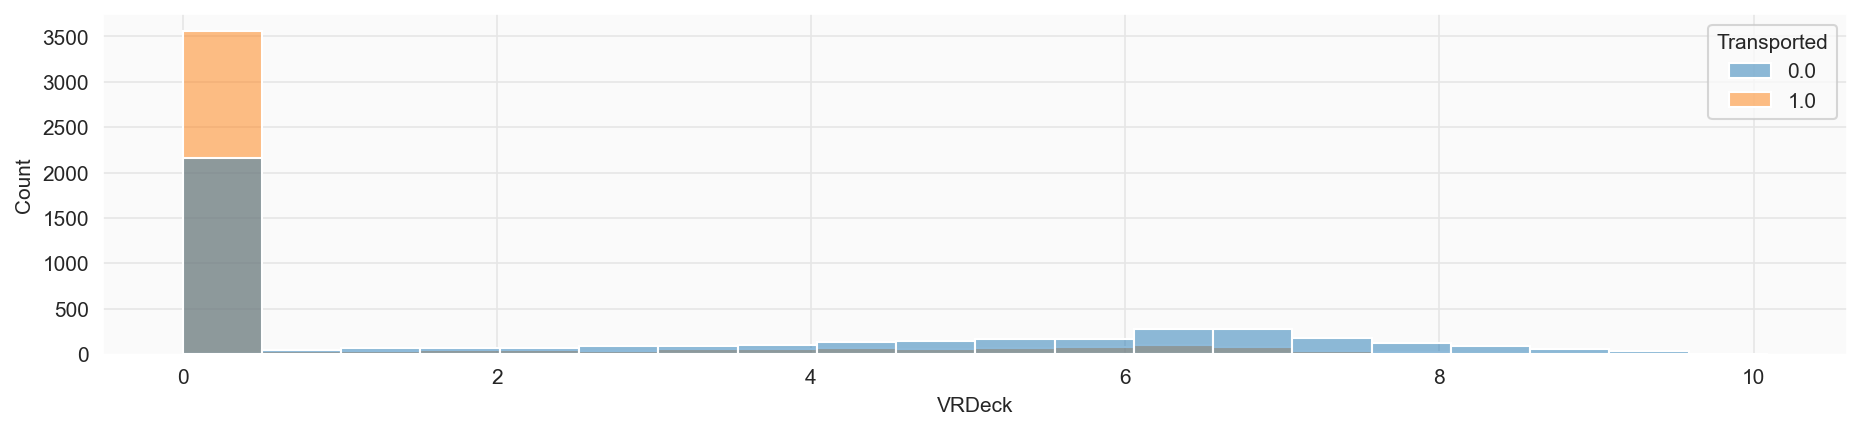

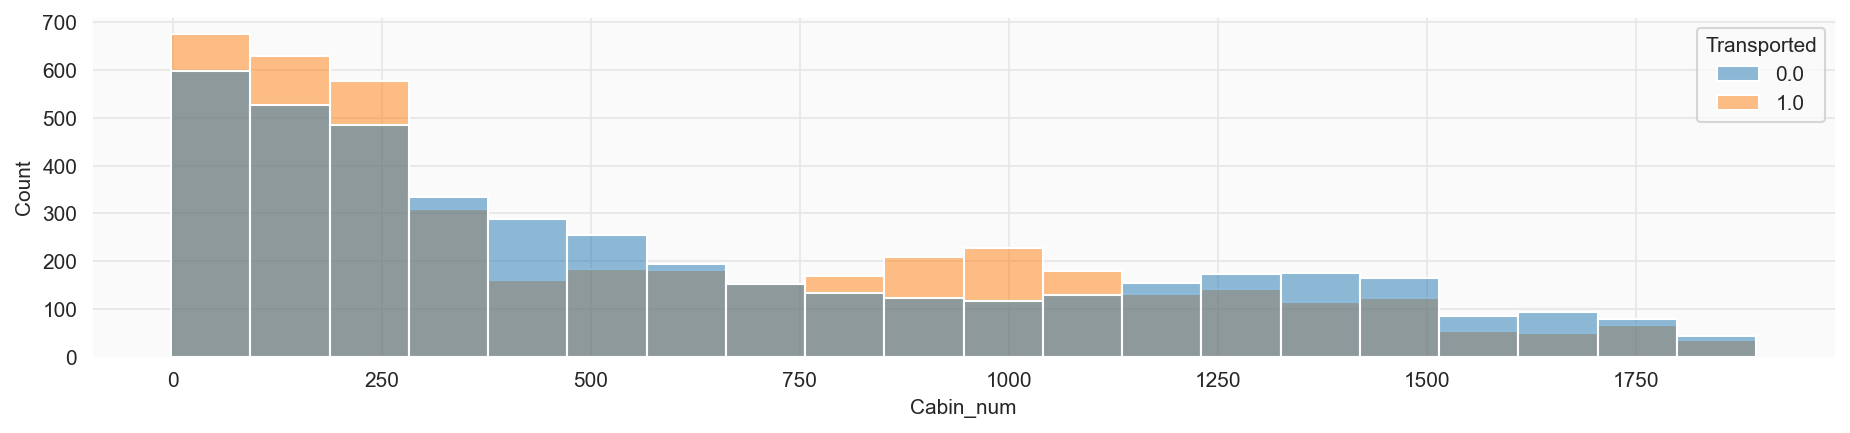

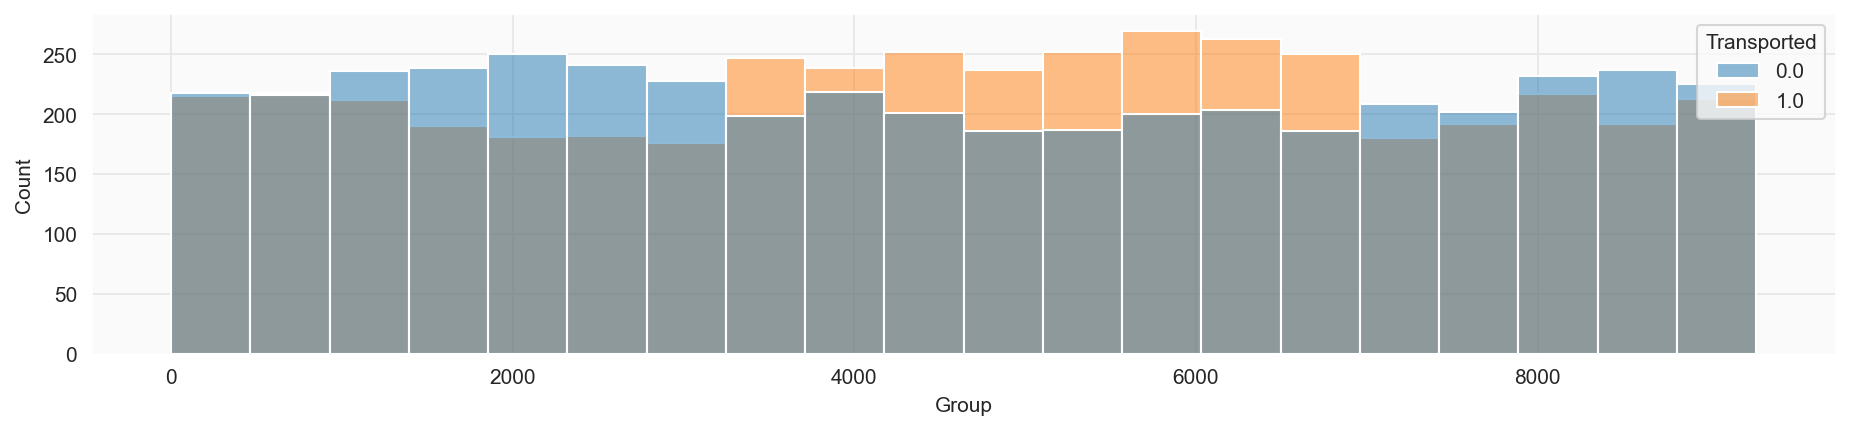

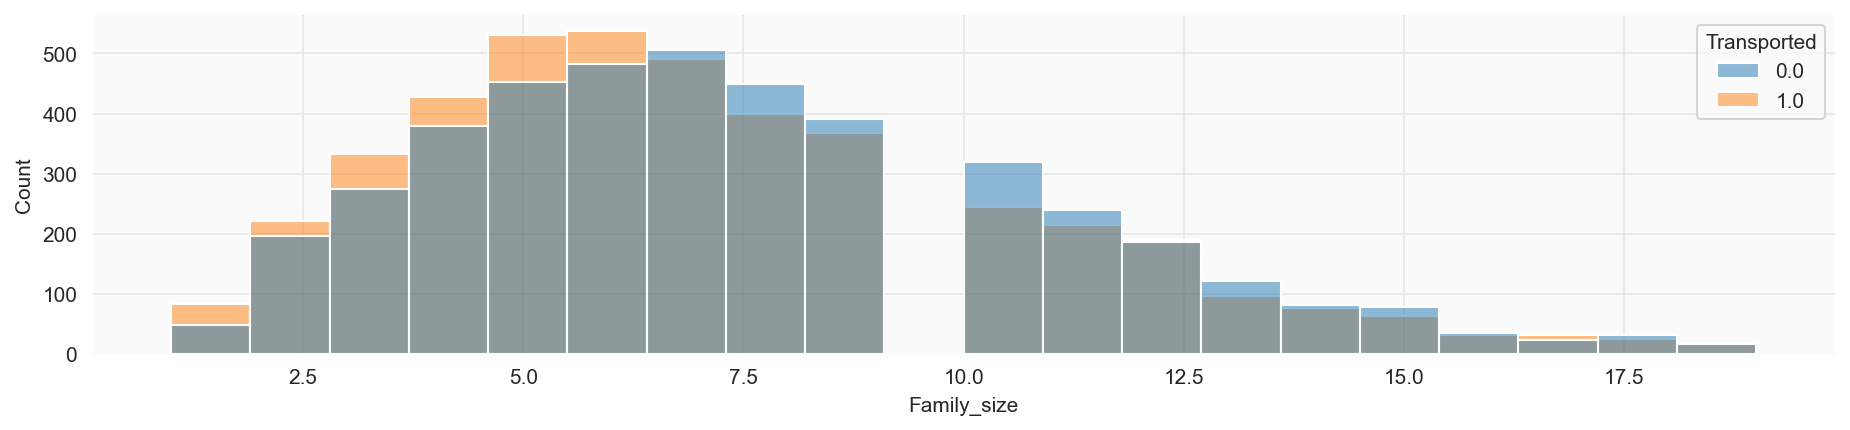

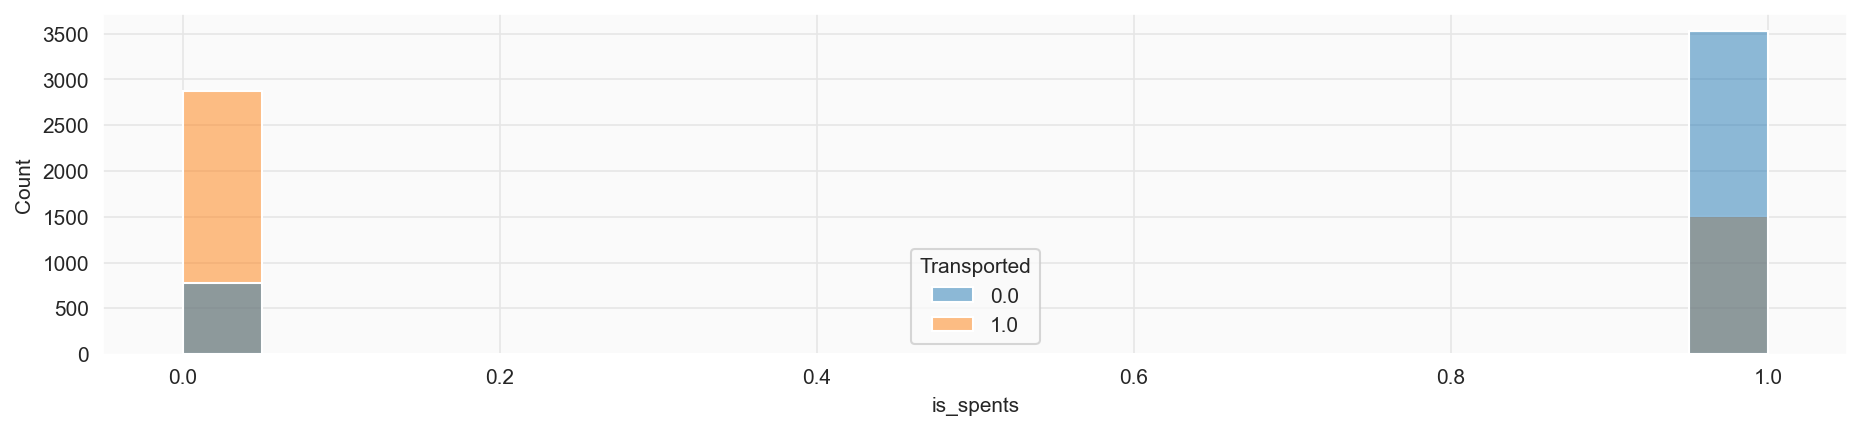

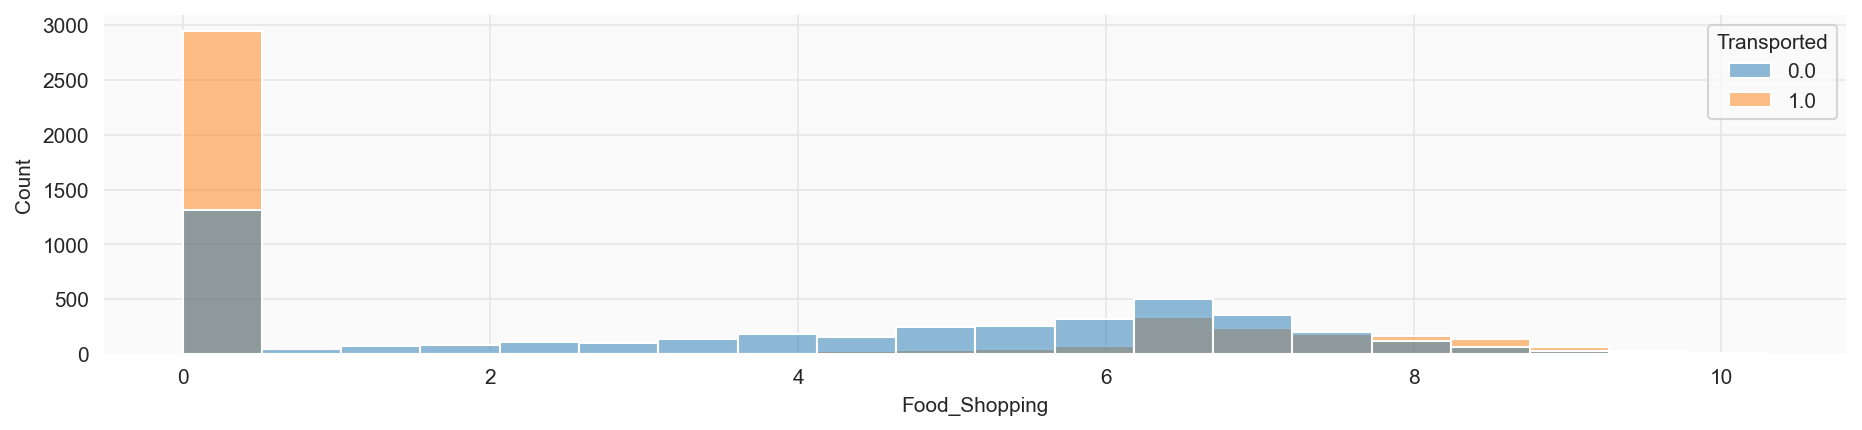

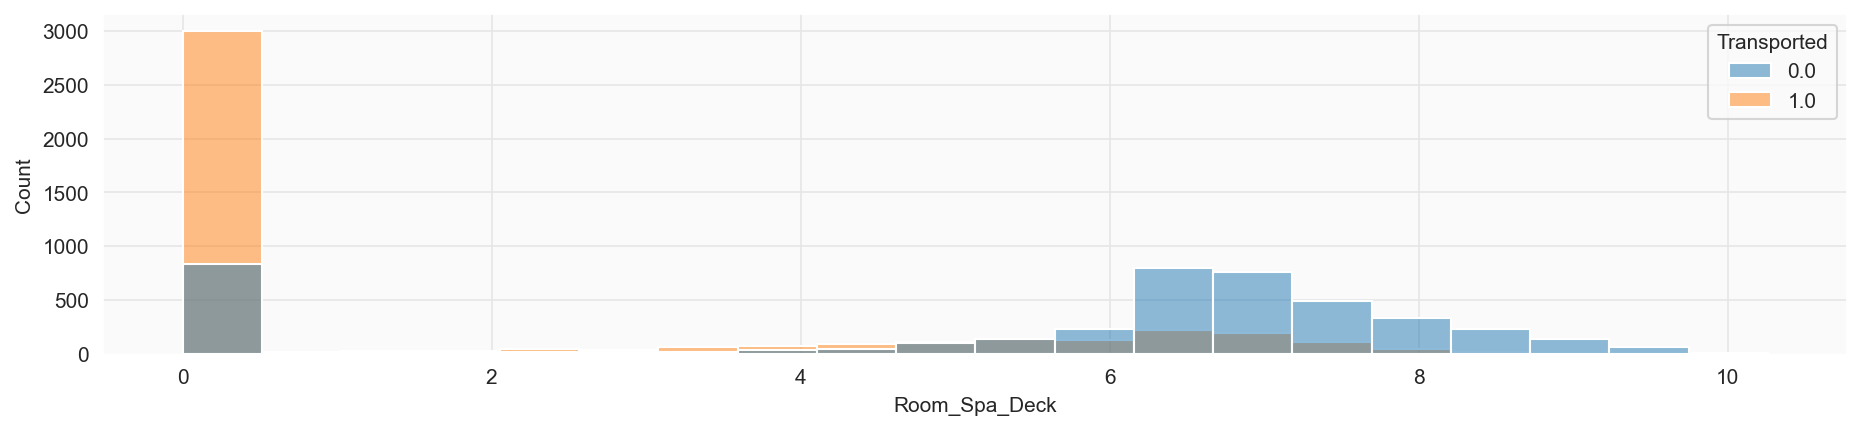

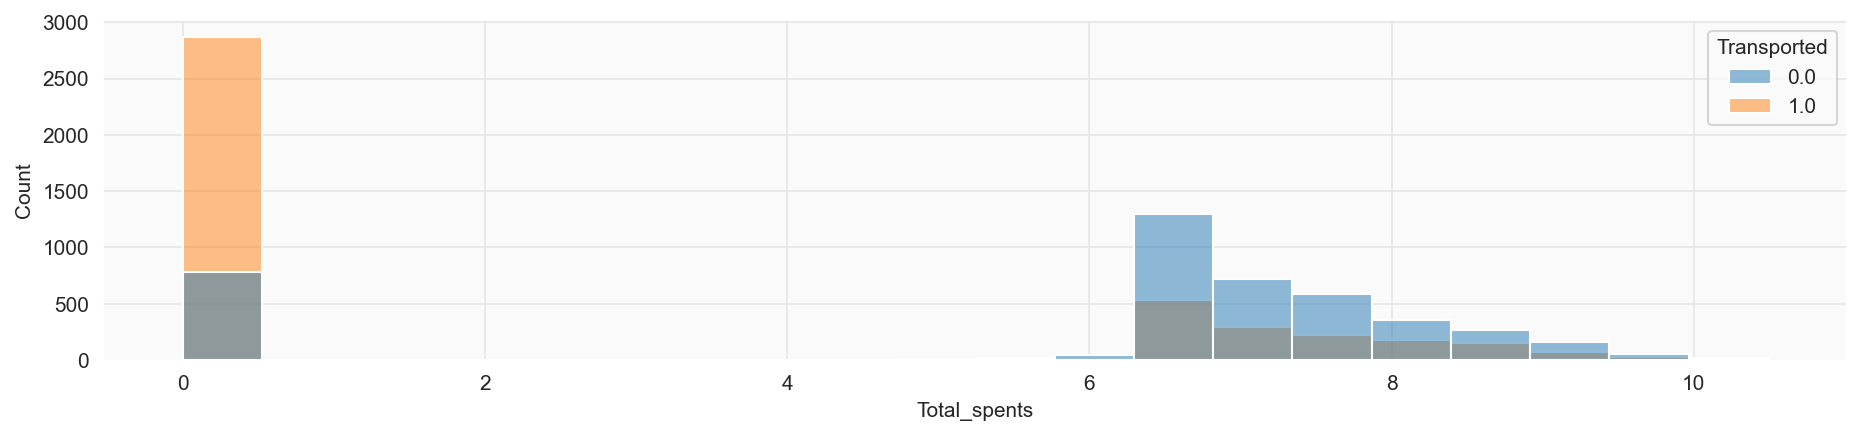

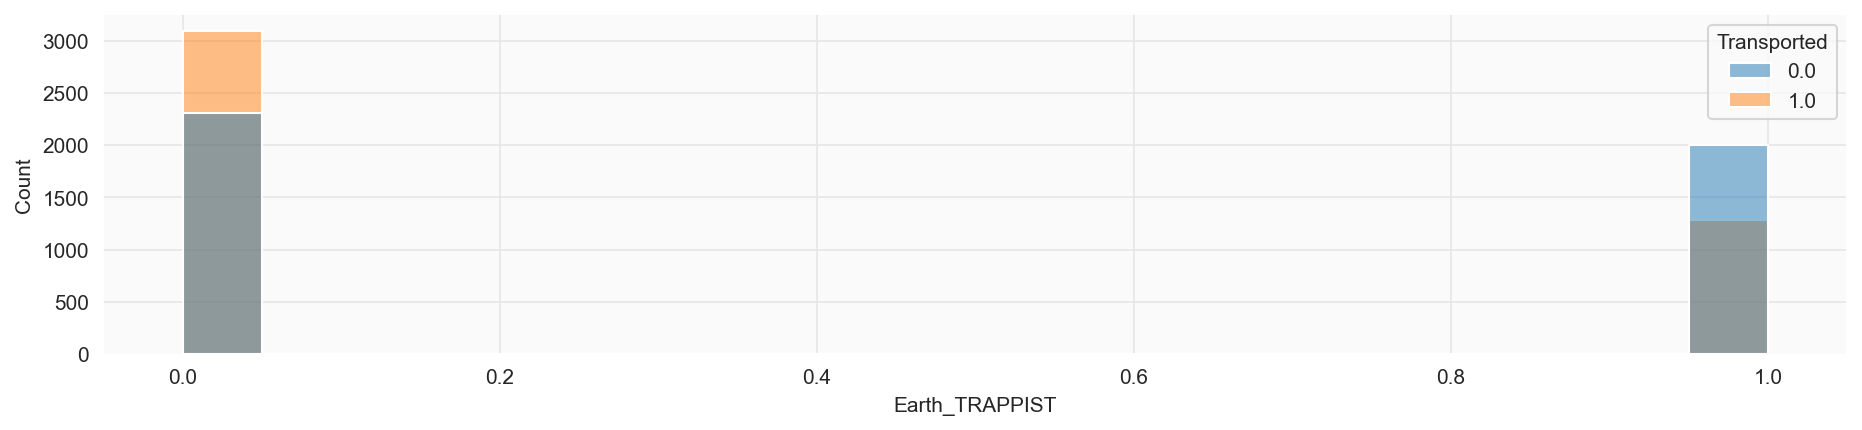

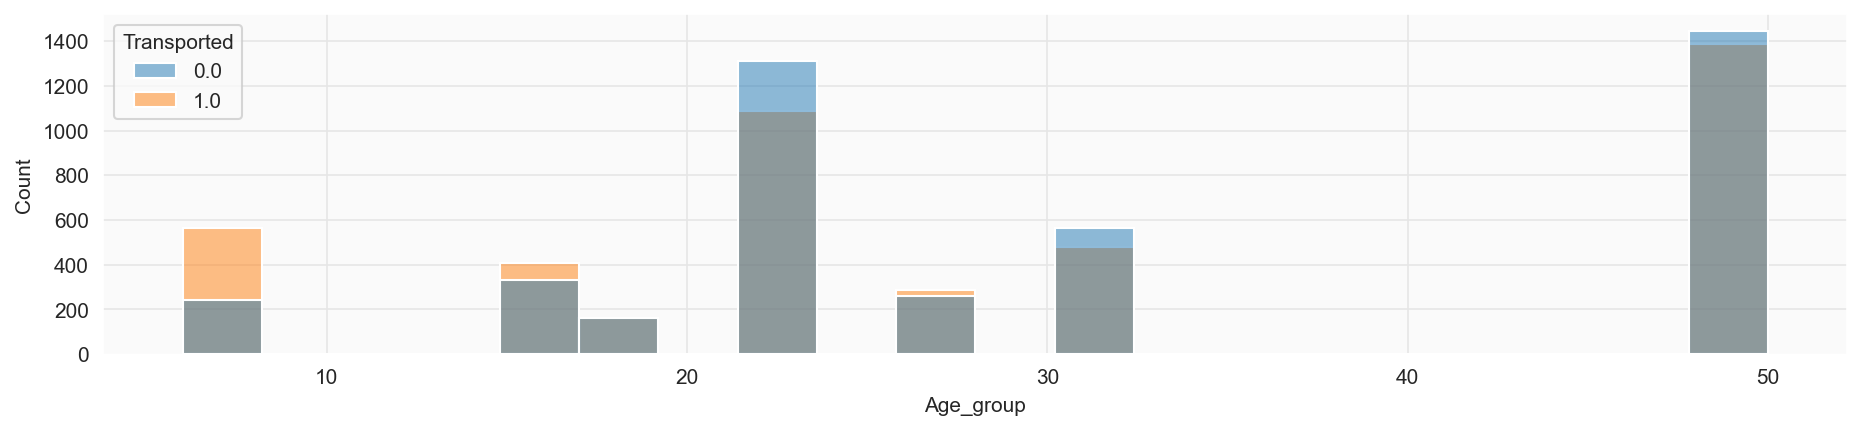

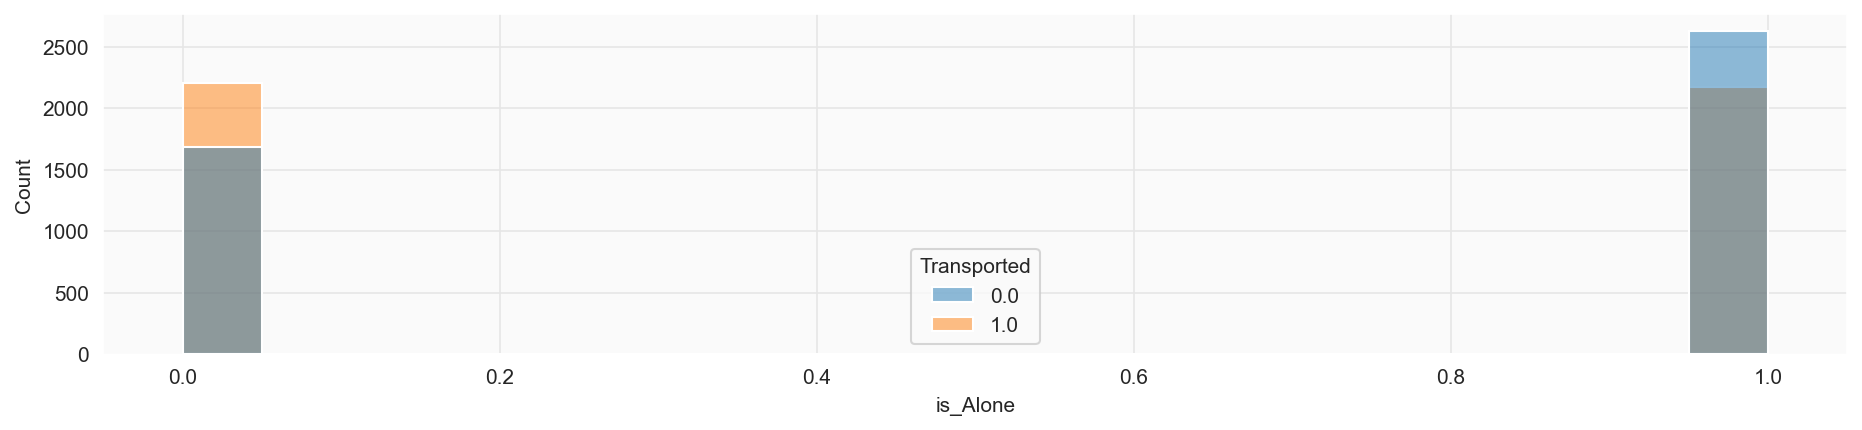

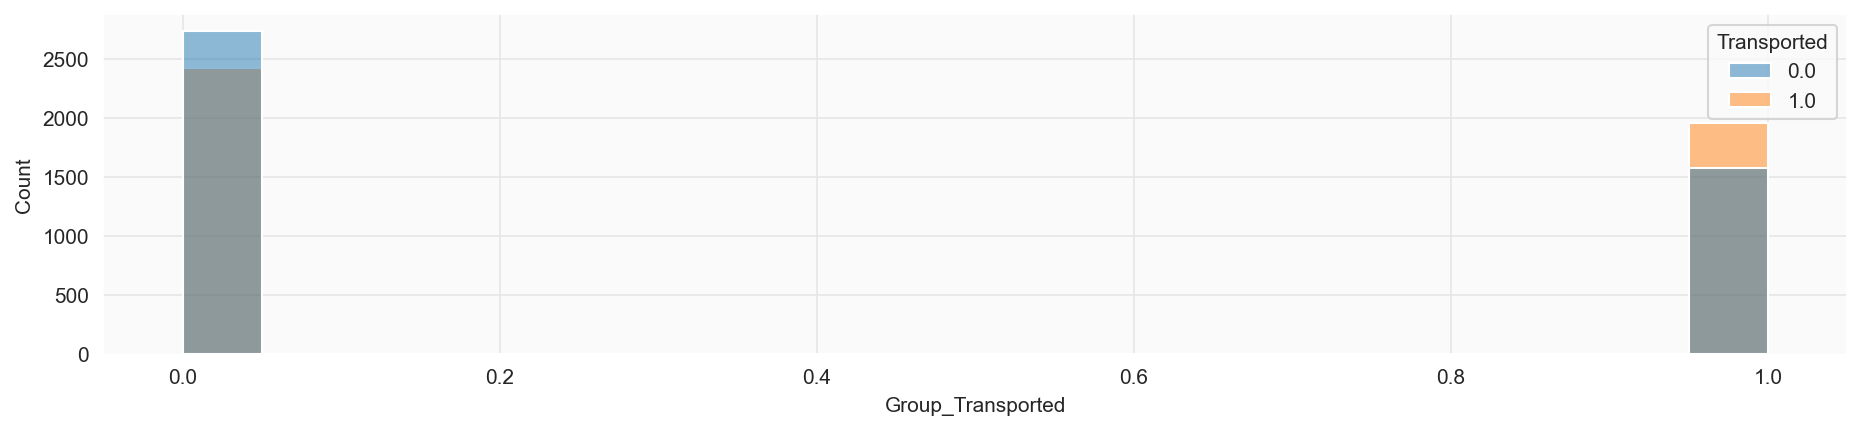

In [895]:
for column in df.drop('Transported', axis=1).columns:
    fig, ax = plt.subplots(figsize=(15,3), dpi=plot_dpi)
    sns.histplot(x=df[column], hue=df.Transported, bins=20);

#### Графики распределений некоторых числовых признаков без учета нулевых значений

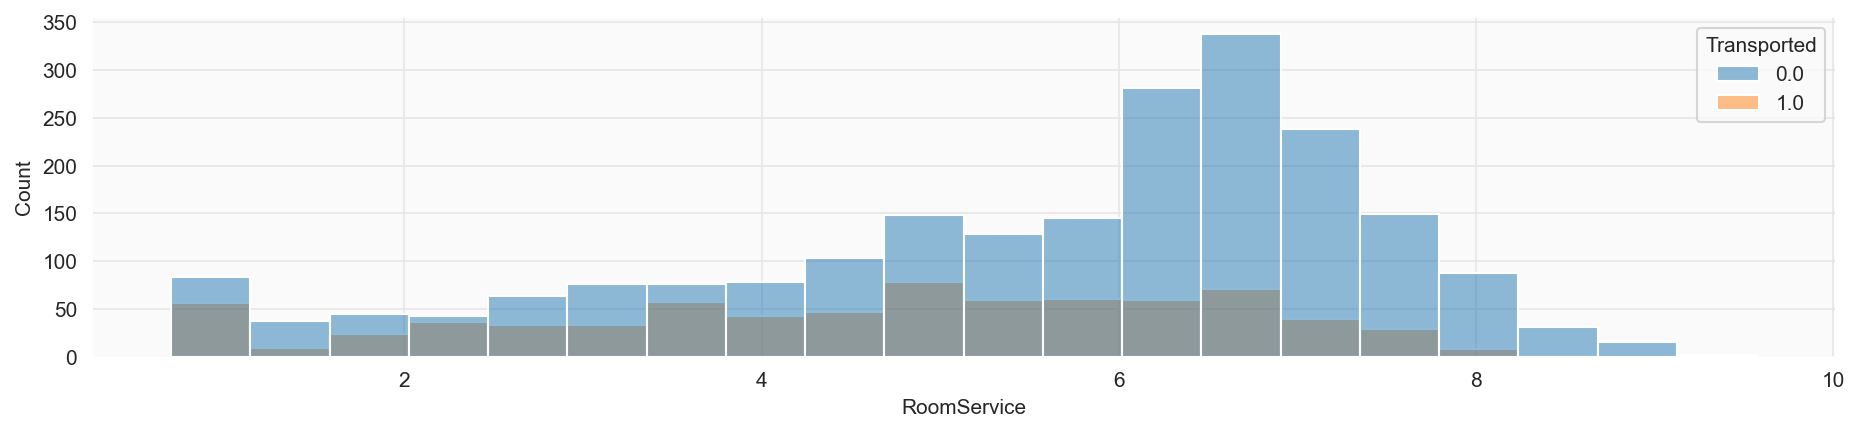

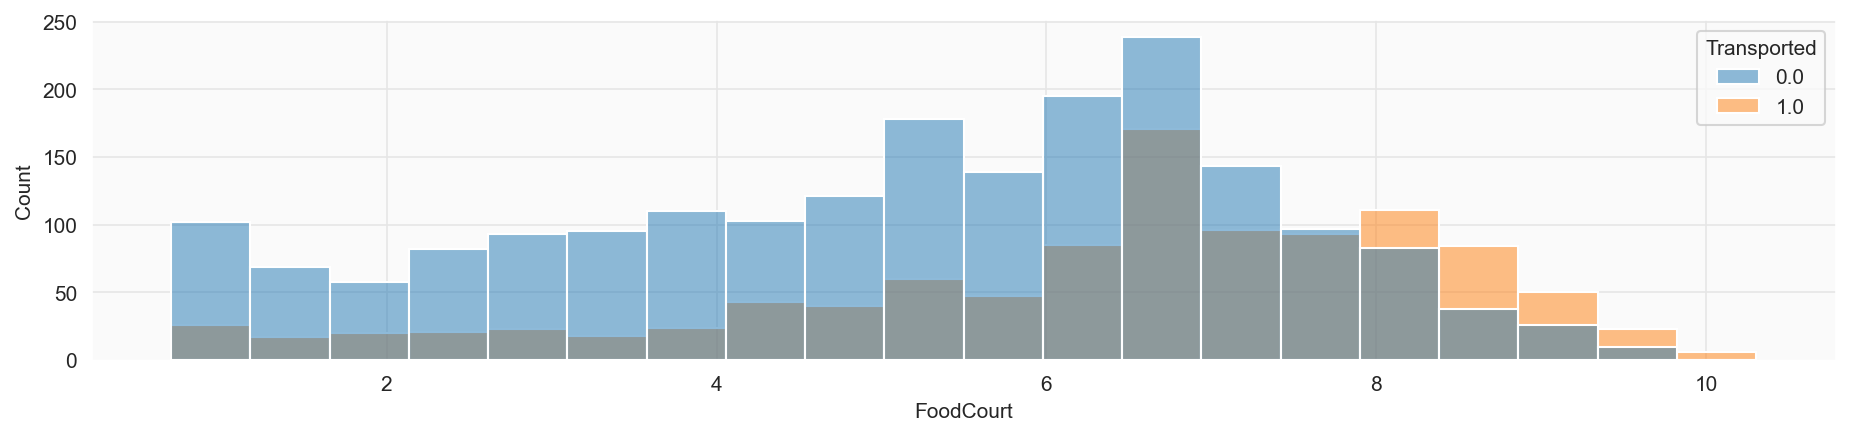

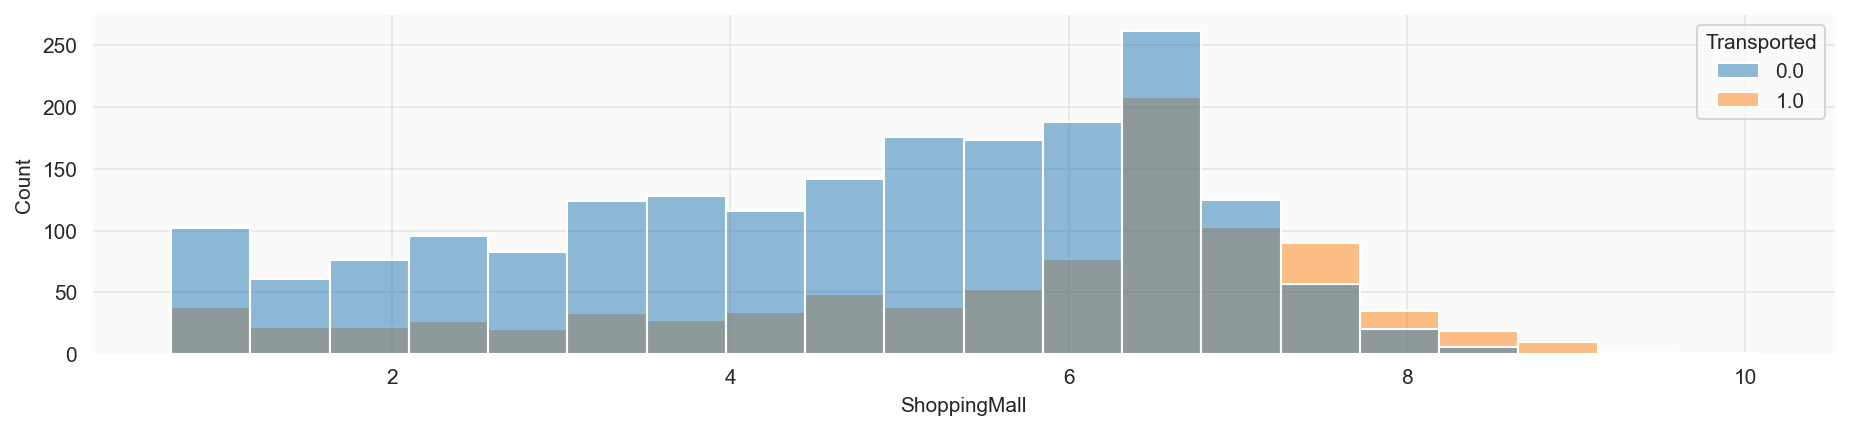

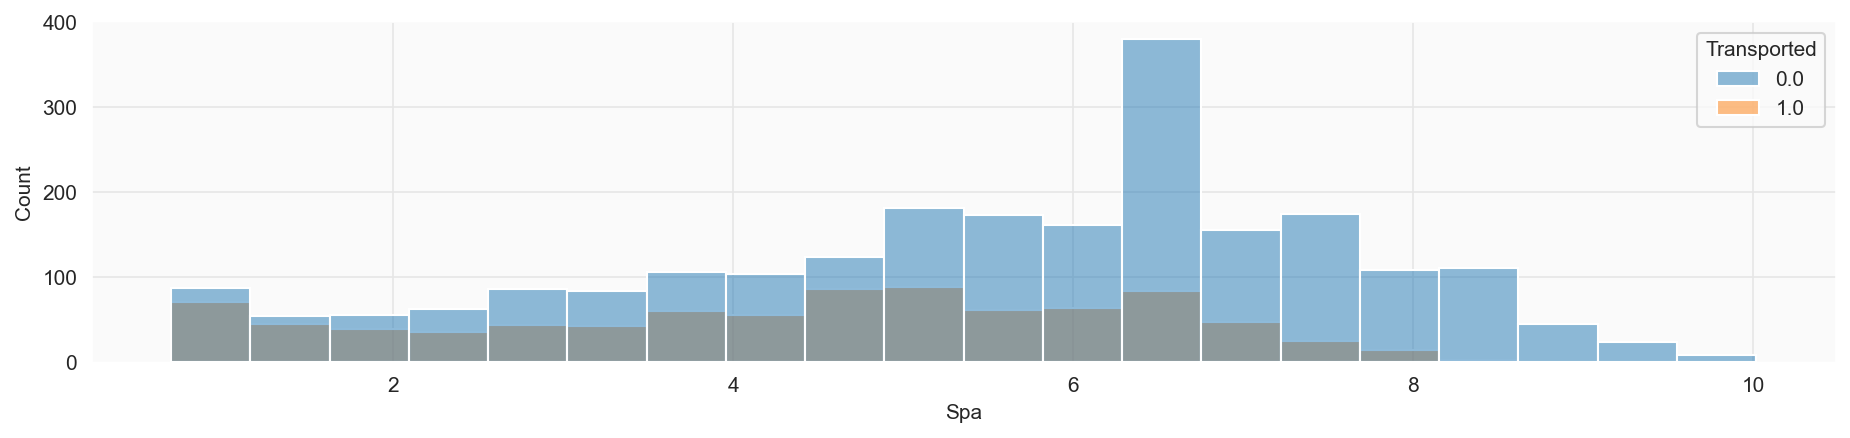

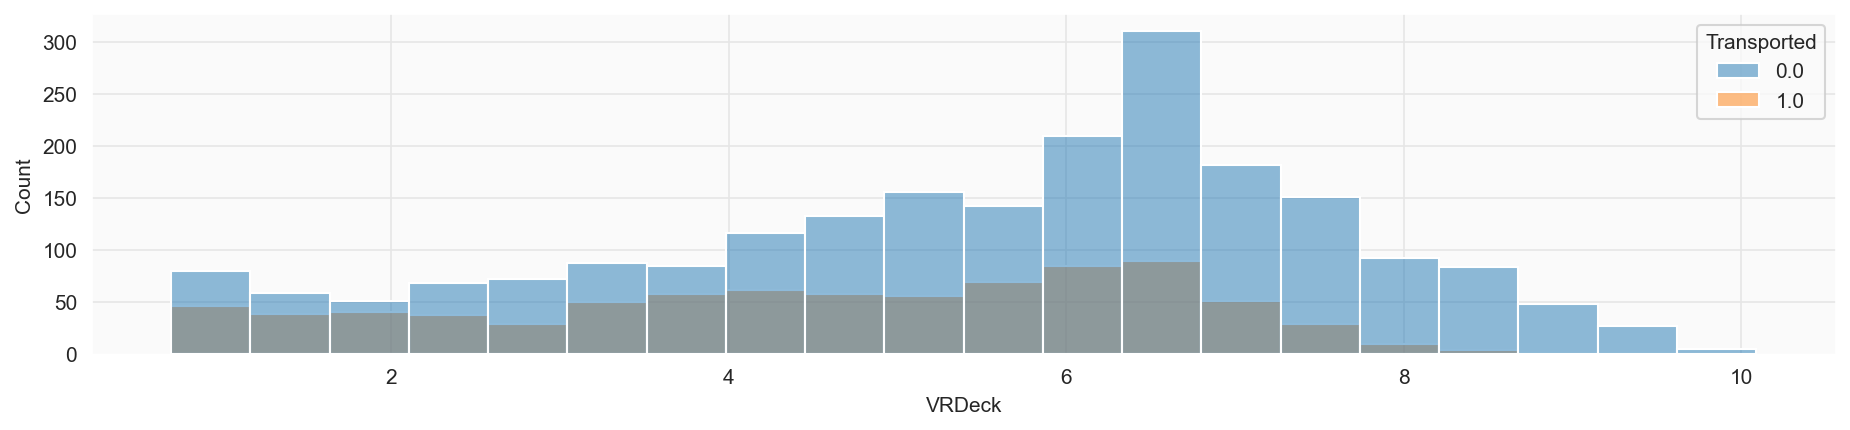

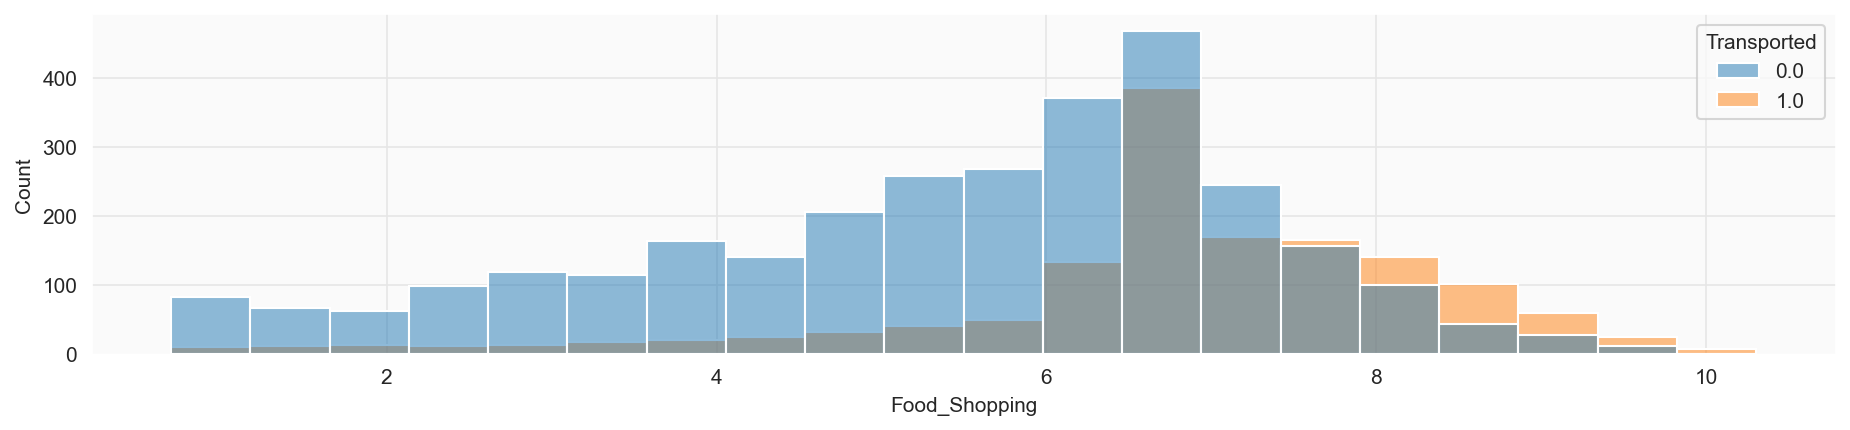

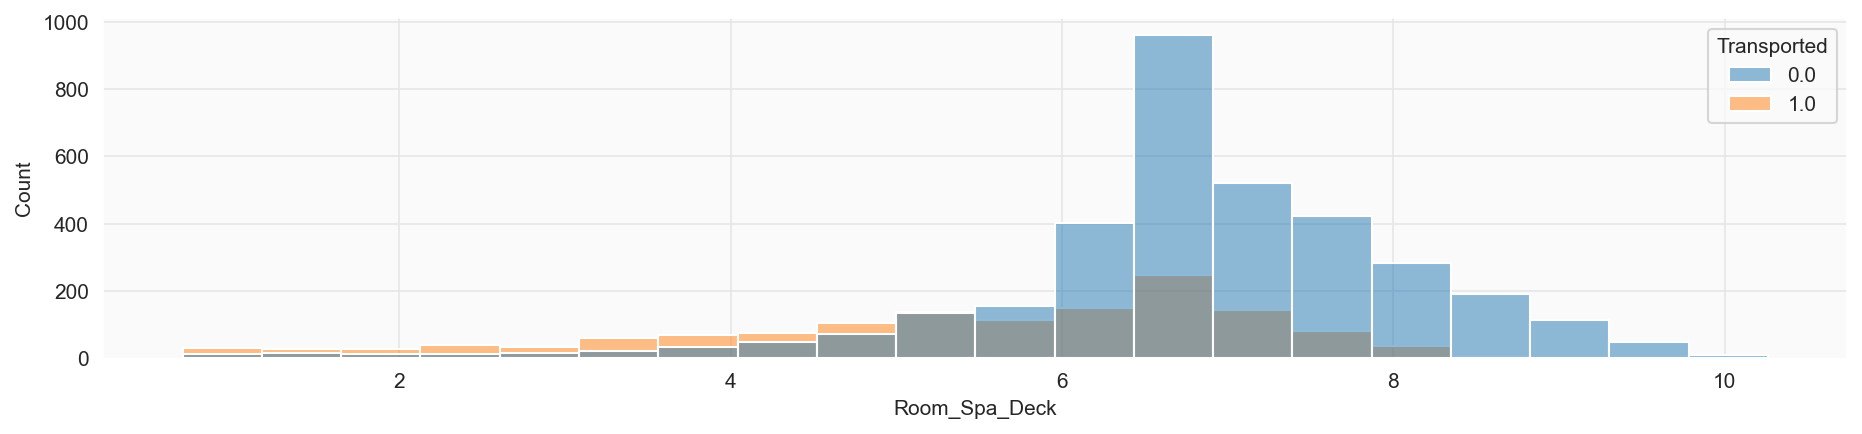

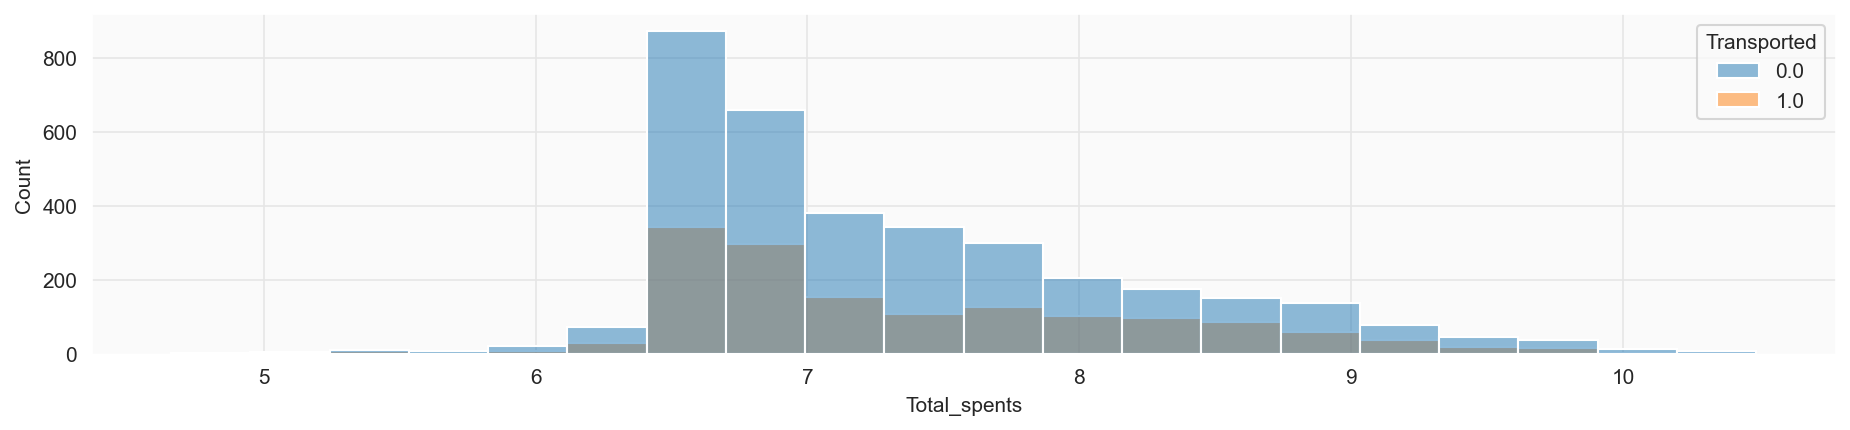

In [896]:
df_2 = df[['Transported','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Food_Shopping','Room_Spa_Deck','Total_spents']].copy()
for column in df_2.drop('Transported', axis=1).columns:
    fig, ax = plt.subplots(figsize=(15,3), dpi=plot_dpi)
    sns.histplot(x=df_2[df_2[column] > 0][column], hue=df_2.Transported, bins=20);

> Если не учитывать нулевые значения, для `FoodCourt` и `ShoppingMall` с ростом значения растет и доля транспортировавшихся. Для `RoomService`, `Spa` и `VRDeck` — наоборот, падает.

### Статистики распределений

In [897]:
(
    df
    .groupby('Transported')
    .describe()
    .T
    .reset_index()
    .rename(columns={'level_0':'feature', 'level_1':'stat', 0:'not_transported', 1:'transported'})
    .query('stat.isin(["mean","50%"])')
)

Transported,feature,stat,not_transported,transported
1,CryoSleep,mean,0.181,0.656
5,CryoSleep,50%,0.000,1.000
9,Age,mean,29.845,27.743
13,Age,50%,27.000,26.000
17,VIP,mean,0.029,0.017
21,VIP,50%,0.000,0.000
25,RoomService,mean,2.776,0.789
29,RoomService,50%,0.693,0.000
33,FoodCourt,mean,2.356,1.541
37,FoodCourt,50%,0.000,0.000


### Корреляция признаков с целевой переменной

По модулю, поскольку знак не важен.

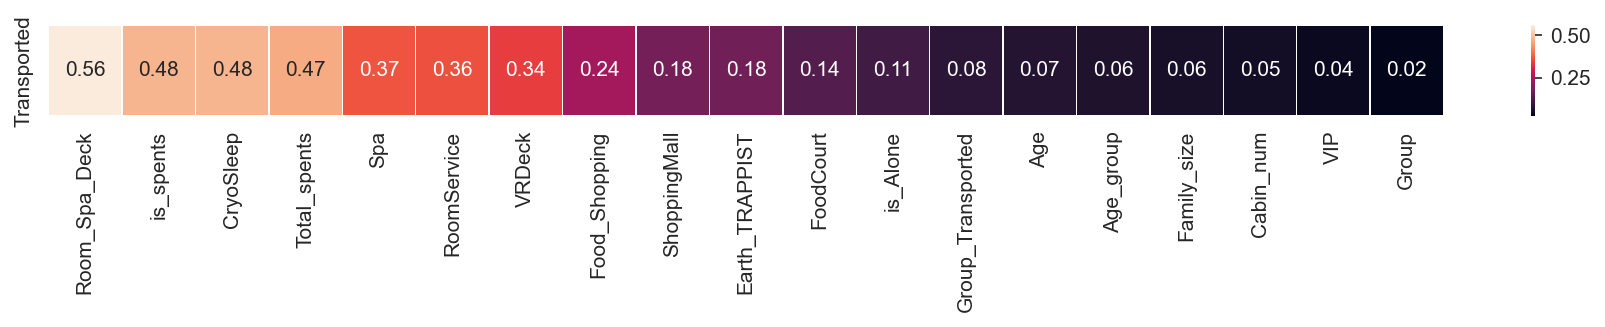

In [898]:
fig, ax = plt.subplots(figsize=(15, 0.8), dpi=plot_dpi)
sns.heatmap(df.corr().Transported.abs().sort_values(ascending=False).to_frame().T.drop('Transported', axis=1), annot=True, fmt='.2f', linewidths=0.2);

### Корреляция признаков между собой

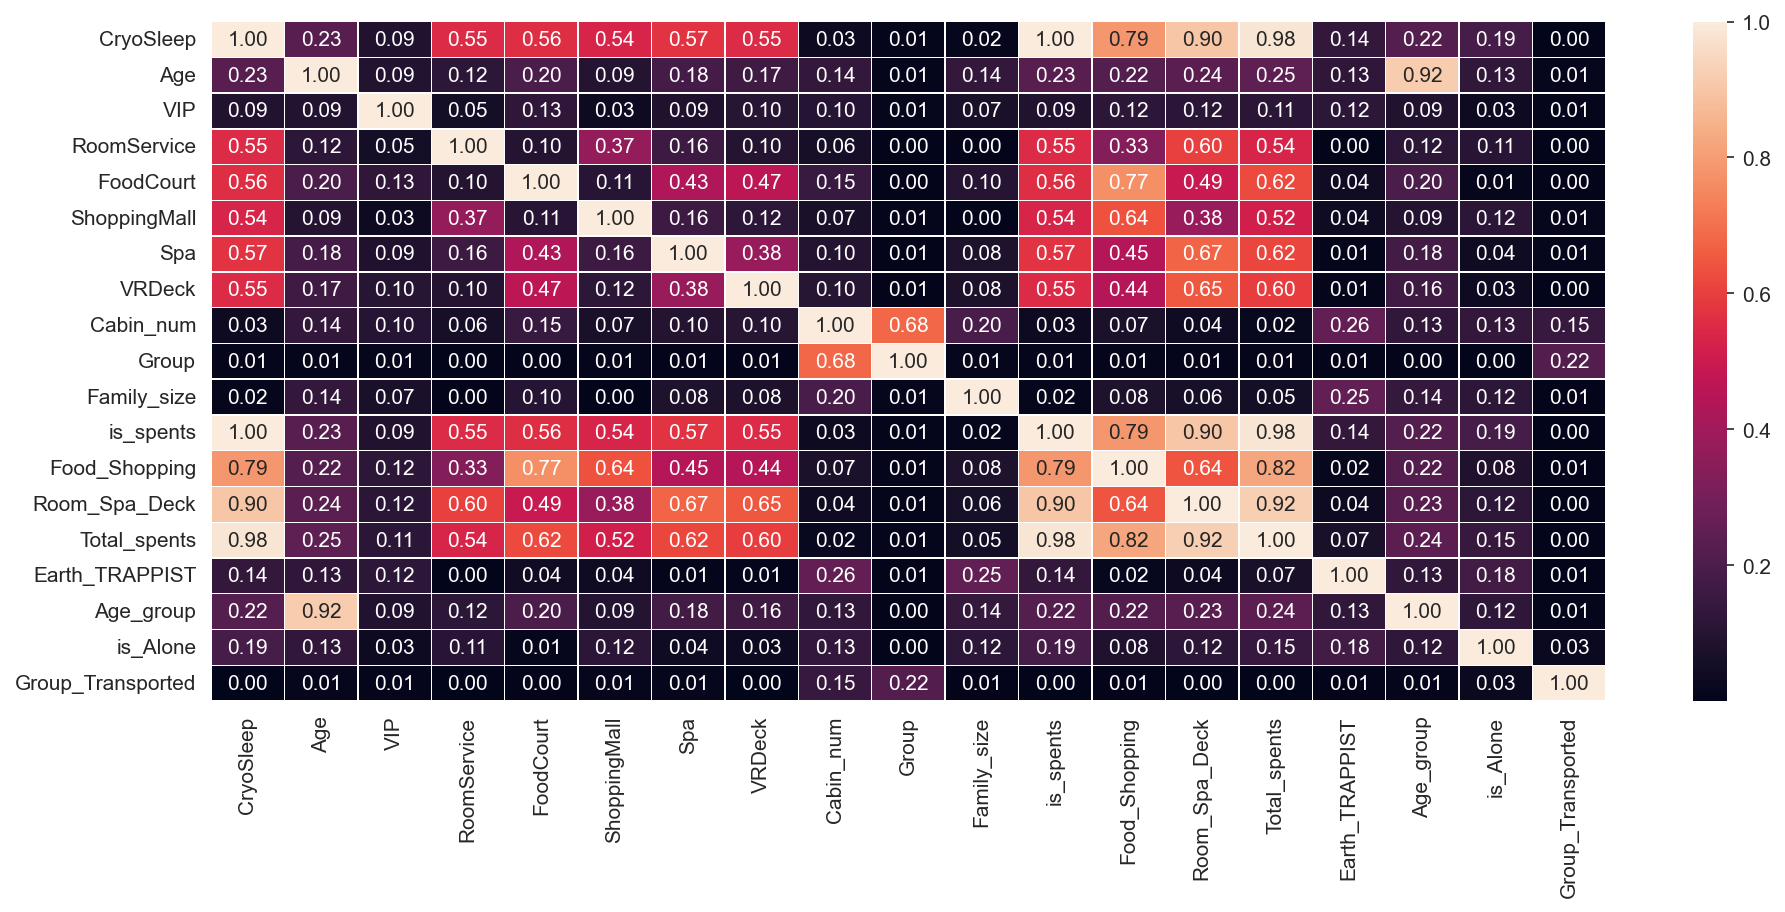

In [899]:
fig, ax = plt.subplots(figsize=(15,6), dpi=plot_dpi)
sns.heatmap(df.drop('Transported', axis=1).corr().abs(), annot=True, fmt='.2f', linewidths=0.2);

### Попарные распределения признаков

Хрен что разглядишь ))  
Нужно выводить по-отдельности.

In [900]:
# (
#     sns.PairGrid(df, hue='Transported', height=3, hue_kws={"alpha": [1,1]})
#     .map_diag(sns.histplot)
#     .map_lower(sns.scatterplot, s=5)
#     .add_legend()
# );

## Эксперименты